# Project - Applying Data Science Methodology on Red Wine Quality Dataset

<img src="https://media.giphy.com/media/jRuv9xc10lVyE/giphy.gif">

You can read more about the Data Science Methodology from this [IBM whitepaper](https://tdwi.org/~/media/64511A895D86457E964174EDC5C4C7B1.PDF) by John Rollins

[Link](https://archive.ics.uci.edu/ml/datasets/wine+quality) for the dataset for context

<img src="https://media-exp1.licdn.com/dms/image/C4D12AQGOPVf5iqhhwQ/article-inline_image-shrink_1000_1488/0/1597756152693?e=1652918400&v=beta&t=iKZ2jX3khsx11lD9JyZWDz-j-Gt2hZsKPXz5rZ0iE1M">

### Business Understanding

The red wine industry shows a recent exponential growth as social drinking is on the rise. Nowadays, industry players are using product quality certifications to promote their products. This is a time-consuming process and requires the assessment given by human experts, which makes this process very expensive. Also, the price of red wine depends on a rather abstract concept of wine appreciation by wine tasters, opinion among whom may have a high degree of variability. Another vital factor in red wine certification and quality assessment is physicochemical tests, which are laboratory-based and consider factors like acidity, pH level, sugar, and other chemical properties. The red wine market would be of interest if the human quality of tasting can be related to wine’s chemical properties so that certification and quality assessment and assurance processes are more controlled. 

The goal is to implement Regression Models and Classification Models on the Red Wine Quality Dataset to determine which features are the best quality red wine indicators and generate insights into each of these factors to our model’s red wine quality.

## **A. Analytic Approach**


Based on the above business understanding one should decide the analytical approach to follow. The approaches can be of 4 types: Descriptive approach (current status and information provided), Diagnostic approach(a.k.a statistical analysis, what is happening and why it is happening), Predictive approach(it forecasts on the trends or future events probability) and Prescriptive approach( how the problem should be solved actually).

**Q1. What is the analytical approach that you would take for this project? Why do you think its the right approach?**

The goal of this project is to find features that are best quality wine indicators. Since we are looking for patterns/trends that results in a best quality wine I believe that the best approach for achieve this goal is through Predictive approach. 

## **B. Data Requirements**



**Q2. What kind of data do we require for predicting the red wine quality and for determining the features that are the best quality red wine indicators?**

For predicting the red wine quality we require physicochemical  information of different quality of wines to find the features of a best quality wine. the physicochemical information includes:
1.  fixed acidity
2. volatile acidity
3. citric acid
4. residual sugar
5.  chlorides
6.  free sulfur dioxide
7.  total sulfur dioxide
8.  density
9.  pH
10. sulphates
11. alcohol

Output variable (based on sensory data):

12. quality (score between 0 and 10)


## **C. Data Collection**



**Q3. From where do we get our data?**

the dataset is taken from [here](https://archive.ics.uci.edu/ml/datasets/wine+quality) and cited as follows:

Paulo Cortez, University of Minho, Guimarães, Portugal, http://www3.dsi.uminho.pt/pcortez
A. Cerdeira, F. Almeida, T. Matos and J. Reis, Viticulture Commission of the Vinho Verde Region(CVRVV), Porto, Portugal
@2009

## **D. Data Understanding**



Link for the dataset https://archive.ics.uci.edu/ml/datasets/wine+quality for context

**Q4. From where are red wine samples obtained?**

the samples are obtained from  Portuguese ["Vinho Verde"](https://www.vinhoverde.pt/en/) wine

**Q5. How can knowing the impact of each variable on the red wine quality help businesses(producers, distributors, etc) ?**

by knowing the impact of each variable, the industry can have a finer control on production and of red wine and ensure the quality of their production 

<li>Check the shape of data, and the datatypes of the features</li>
<li>Understand the data by carrying out any steps that you think are necessary</li>

### **D.1. Reading data**

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

data = pd.read_csv('winequality-red.csv')
data.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

from a glance we can see that the data for different features seems to be continuous while our target feature (`quality`) is nominal. 

In [2]:
data.groupby('quality').mean()

fixed acidity  volatile acidity  citric acid  residual sugar  \
quality                                                                 
3             8.360000          0.884500     0.171000        2.635000   
4             7.779245          0.693962     0.174151        2.694340   
5             8.167254          0.577041     0.243686        2.528855   
6             8.347179          0.497484     0.273824        2.477194   
7             8.872362          0.403920     0.375176        2.720603   
8             8.566667          0.423333     0.391111        2.577778   

         chlorides  free sulfur dioxide  total sulfur dioxide   density  \
quality                                                                   
3         0.122500            11.000000             24.900000  0.997464   
4         0.090679            12.264151             36.245283  0.996542   
5         0.092736            16.983847             56.513950  0.997104   
6         0.084956            15.711599             40.869906  0.996615   
7         0.076588            14.045226             35.020101  0.996104   
8         0.068444            13.277778             33.444444  0.995212   

               pH  sulphates    alcohol  
quality                                  
3        3.398000   0.570000   9.955000  
4        3.381509   0.596415  10.265094  
5        3.304949   0.620969   9.899706  
6        3.318072   0.675329  10.629519  
7        3.290754   0.741256  11.465913  
8        3.267222   0.767778  12.094444

from this table we can see that as quality increases we can see that leveles of volatile acidity, and chloride decreases, while levels of citric acid, total sulfur dioxide sulphate, and alcohol increases

In [3]:
data['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

We can see that we larger amount of data present for quality 5, 6, and 7 compared to lower quality 3, and 4 and the highest quality 8. Due to this reason our model might have difficulty making predictions for these qualities. 

### **D.2. EDA**

In [4]:
data.shape

(1599, 12)

by using the shape of the data we can see that we have 12 features in total (1 target and 11 features) and 1599 rows (instances of the data)

In [5]:
data.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

we can see that all our features are float meaning we are working with continuous features. we can use the describe method to try and understand the data better:

In [6]:
data.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

from the *count* row, we can see that no values are missing in any of the features. We can further check is this by the following method:

In [7]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Since we want to see which of these features indicate the best wine quality, we need to explore their correlation:

In [8]:
data.corr()

fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.256131     0.671703   
volatile acidity          -0.256131          1.000000    -0.552496   
citric acid                0.671703         -0.552496     1.000000   
residual sugar             0.114777          0.001918     0.143577   
chlorides                  0.093705          0.061298     0.203823   
free sulfur dioxide       -0.153794         -0.010504    -0.060978   
total sulfur dioxide      -0.113181          0.076470     0.035533   
density                    0.668047          0.022026     0.364947   
pH                        -0.682978          0.234937    -0.541904   
sulphates                  0.183006         -0.260987     0.312770   
alcohol                   -0.061668         -0.202288     0.109903   
quality                    0.124052         -0.390558     0.226373   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity               0.114777   0.093705            -0.153794   
volatile acidity            0.001918   0.061298            -0.010504   
citric acid                 0.143577   0.203823            -0.060978   
residual sugar              1.000000   0.055610             0.187049   
chlorides                   0.055610   1.000000             0.005562   
free sulfur dioxide         0.187049   0.005562             1.000000   
total sulfur dioxide        0.203028   0.047400             0.667666   
density                     0.355283   0.200632            -0.021946   
pH                         -0.085652  -0.265026             0.070377   
sulphates                   0.005527   0.371260             0.051658   
alcohol                     0.042075  -0.221141            -0.069408   
quality                     0.013732  -0.128907            -0.050656   

                      total sulfur dioxide   density        pH  sulphates  \
fixed acidity                    -0.113181  0.668047 -0.682978   0.183006   
volatile acidity                  0.076470  0.022026  0.234937  -0.260987   
citric acid                       0.035533  0.364947 -0.541904   0.312770   
residual sugar                    0.203028  0.355283 -0.085652   0.005527   
chlorides                         0.047400  0.200632 -0.265026   0.371260   
free sulfur dioxide               0.667666 -0.021946  0.070377   0.051658   
total sulfur dioxide              1.000000  0.071269 -0.066495   0.042947   
density                           0.071269  1.000000 -0.341699   0.148506   
pH                               -0.066495 -0.341699  1.000000  -0.196648   
sulphates                         0.042947  0.148506 -0.196648   1.000000   
alcohol                          -0.205654 -0.496180  0.205633   0.093595   
quality                          -0.185100 -0.174919 -0.057731   0.251397   

                       alcohol   quality  
fixed acidity        -0.061668  0.124052  
volatile acidity     -0.202288 -0.390558  
citric acid           0.109903  0.226373  
residual sugar        0.042075  0.013732  
chlorides            -0.221141 -0.128907  
free sulfur dioxide  -0.069408 -0.050656  
total sulfur dioxide -0.205654 -0.185100  
density              -0.496180 -0.174919  
pH                    0.205633 -0.057731  
sulphates             0.093595  0.251397  
alcohol               1.000000  0.476166  
quality               0.476166  1.000000

looking at the `quality` row we can see that quality has:
- a strong positive correlation with alcohol (47.6%), sulphate (25.1%), and citric acid (22.6%).
- a mild positive correlation with fixed acidity (12.4%). 
- strong negative correlation with volatile acidity (39.1%)
- mild negative correlation with chloride (12.9%), total sulfur dioxide (18.5%), and density (17.5%)


### **D.3. Plotting data: boxplots**

<Figure size 432x288 with 0 Axes>

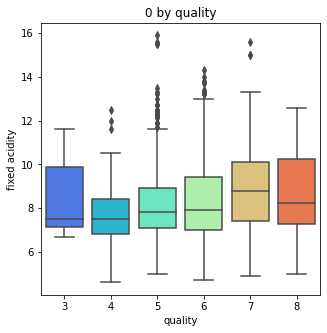

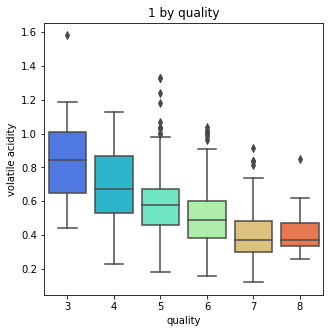

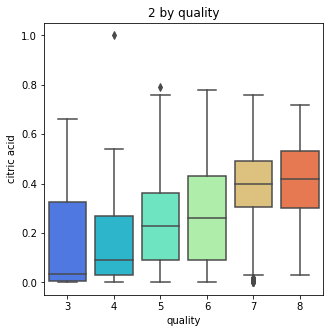

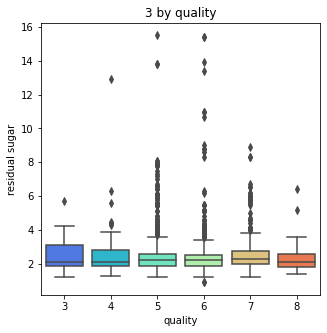

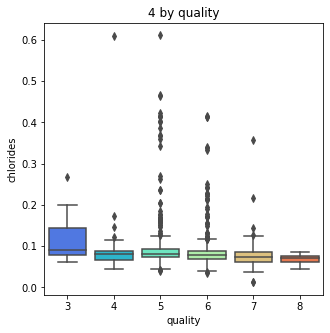

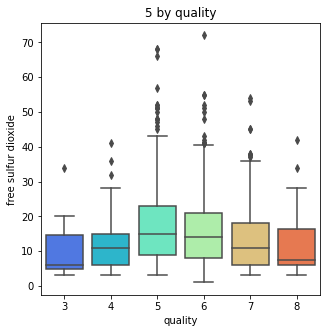

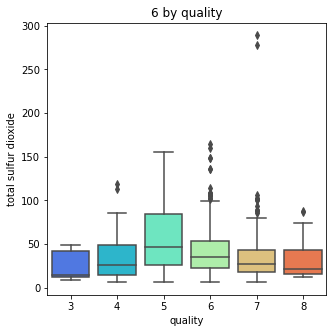

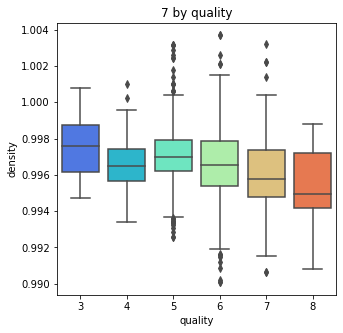

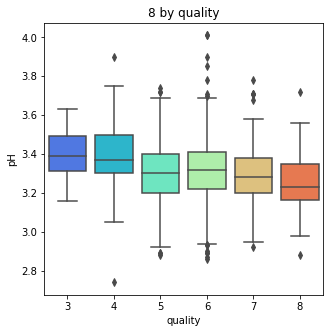

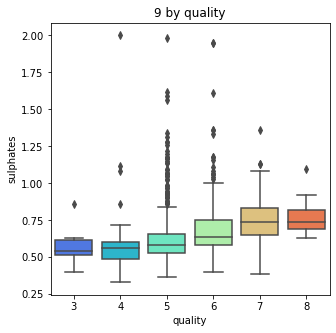

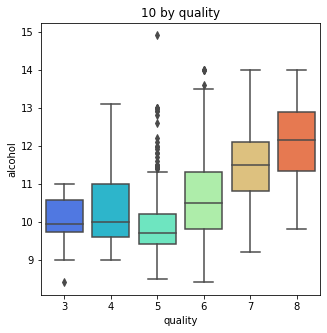

In [9]:

for i, col in enumerate(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density'
         ,'pH', 'sulphates', 'alcohol']):
    plt.figure(i)
    plt.figure(figsize=(5,5))
    sns.boxplot(x='quality',y=col ,data=data, palette='rainbow')
    plt.title("{} by quality".format(i))


We can see that there are many outlier present for each of the features. In the Data preparation section, it would be a good idea to remove them to ensure that they wont affect our model. 

### **D.4. Plotting data: bar graphs**

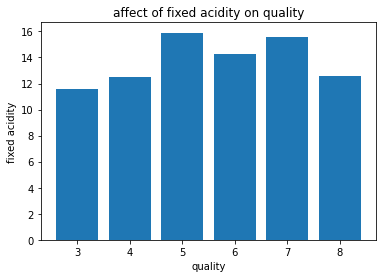

In [10]:
x = data['quality']
y = data['fixed acidity']
plt.bar(x,y)
plt.xlabel('quality')
plt.ylabel("fixed acidity")
plt.title('affect of fixed acidity on quality')
plt.show()

`fixed acidity` had a mild positive correlation with `quality` acidity (12.4%).  We can see that as the quality increases the fixed acidity also increases but this is not a trend. for exmple, wine with quality 6 has lower fixed acidity than quality 5.


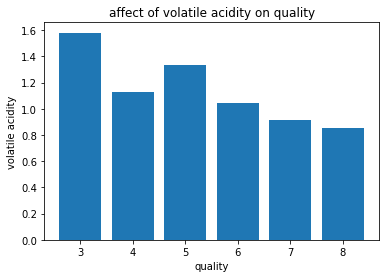

In [11]:
x = data['quality']
y = data['volatile acidity']
plt.bar(x,y)
plt.xlabel('quality')
plt.ylabel("volatile acidity")
plt.title('affect of volatile acidity on quality')
plt.show()

volatile acidity had a strong negative correlation with quality. As we can see on the graph above, as the quality increases volatile acidity decreases. in other words, the higher quality wines have lower volatile acidity. 

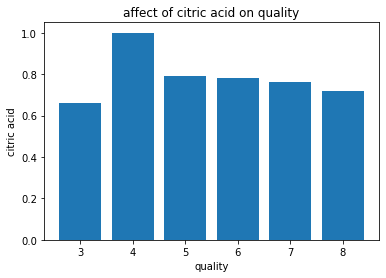

In [12]:
x = data['quality']
y = data['citric acid']
plt.bar(x,y)
plt.xlabel('quality')
plt.ylabel("citric acid")
plt.title('affect of citric acid on quality')
plt.show()


The `citric acid` has a positive correlation of 22.6% with the quality. We can see that generally the higher quality wines have higher amount of citric acid. of course this is not always the case (quality 4). these discrepancy  might be because of the presence of outliers or there might a correlation between this feature and another feature that is affecting this feature

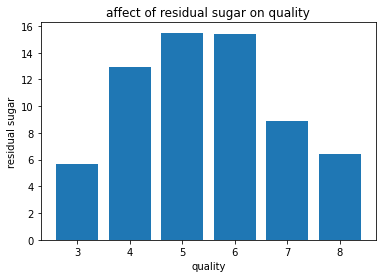

In [13]:
x = data['quality']
y = data['residual sugar']
plt.bar(x,y)
plt.xlabel('quality')
plt.ylabel("residual sugar")
plt.title('affect of residual sugar on quality')
plt.show()

the `residual sugar` had a weak correlation with the `quality` so there is no surprise that we do not see a linear relationship here. However, one might conclude that the both low and high quality wines have lower `residual sugar` than the medium quality ones. 

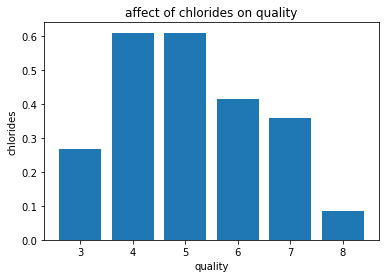

In [14]:
x = data['quality']
y = data['chlorides']
plt.bar(x,y)
plt.xlabel('quality')
plt.ylabel("chlorides")
plt.title('affect of chlorides on quality')
plt.show()

in the correlation table above, we noted that the `chlorides` has a mild negative correlation with quality (-12.9%). So we expect that as the levels of chlorides drops the quality of the wine increases, meaning that higher quality wines have lower amount of chlorides. This is generally the case on the graph above, except for the lowest quality wine (3). 

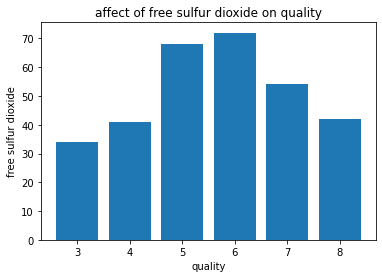

In [15]:
x = data['quality']
y = data['free sulfur dioxide']
plt.bar(x,y)
plt.xlabel('quality')
plt.ylabel("free sulfur dioxide")
plt.title('affect of free sulfur dioxide on quality')
plt.show()

as noted before, the `free sulfur dioxide` has a weak correlation with `quality`. 

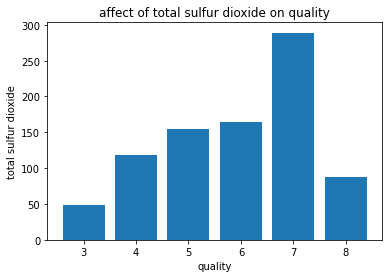

In [16]:
x = data['quality']
y = data['total sulfur dioxide']
plt.bar(x,y)
plt.xlabel('quality')
plt.ylabel("total sulfur dioxide")
plt.title('affect of total sulfur dioxide on quality')
plt.show()

the `total sulfur dioxide` has a mild negative correlation with `quality`. as we can see as the `total sulfur dioxide` increases the wine quality also increases. However for the highest quality the amount of total sulfur dioxide is less than the medium quality ones. 

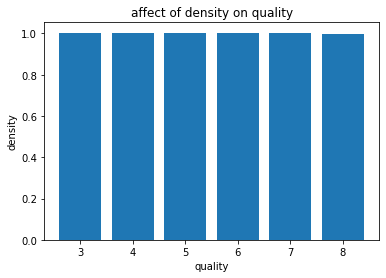

In [17]:
x = data['quality']
y = data['density']
plt.bar(x,y)
plt.xlabel('quality')
plt.ylabel("density")
plt.title('affect of density on quality')
plt.show()

As we can see the `density` is almost identical for all different qualities eventhough it has a mild negative correlation of 17.5% with quality. 

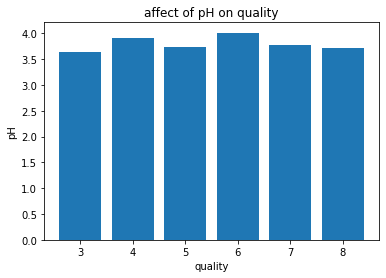

In [18]:
x = data['quality']
y = data['pH']
plt.bar(x,y)
plt.xlabel('quality')
plt.ylabel("pH")
plt.title('affect of pH on quality')
plt.show()

pH has a very weak correlation with quality so there is no surprise that we do not see any specific trends here. 

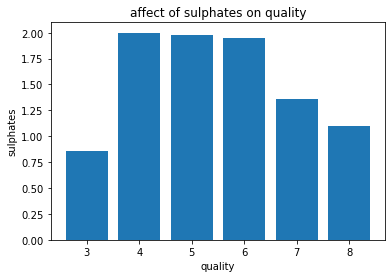

In [19]:
x = data['quality']
y = data['sulphates']
plt.bar(x,y)
plt.xlabel('quality')
plt.ylabel("sulphates")
plt.title('affect of sulphates on quality')
plt.show()

`sulphates` had a strong positive correlation of 25.1% with quality meaning that we expect that as the quality increases the amount of sulphates also increases. in the graph above we can see that this is true for the medium quality ones but as the quality increases the levels of sulphates start to decrease instead of increasing

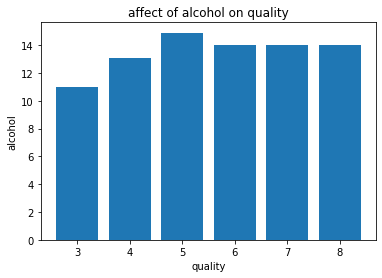

In [20]:
x = data['quality']
y = data['alcohol']
plt.bar(x,y)
plt.xlabel('quality')
plt.ylabel("alcohol")
plt.title('affect of alcohol on quality')
plt.show()

the `alcohol` had the strongest correlation with the quality (+47.6%). There is some small discrepancy for quality = 5, but generally higher quality wines have higher amount of alcohol. 

## **E. Data Preparation**



#### Explore the dataset further

<li>Check for missing values and handle if any</li>
<li>Check for outliers if any and handle them</li>
<li>Implement Correlation heatmap</li>
<li>Check the distribution of data using histograms</li>
<li>Prepare the data for modeling by carrying out any steps that you think are necessary</li>

### **Fill missing values**

As noted in the previous section, there is no missing values in the dataset:

In [21]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

### **Removing outliers**

In [22]:
data.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

by looking at the mean, min, and max rows on the table above, we can see that our data contains some outliers (also on the boxplots in previous section). 

C:\Users\elmir\anaconda3\envs\tensorflow\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


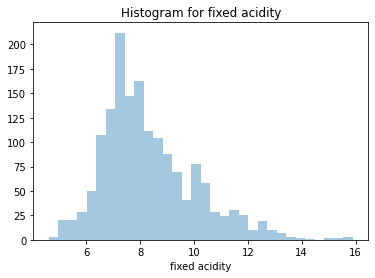

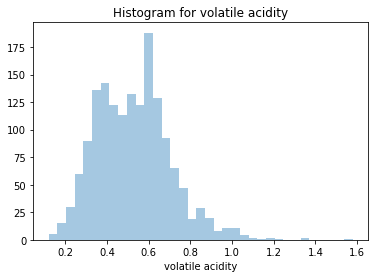

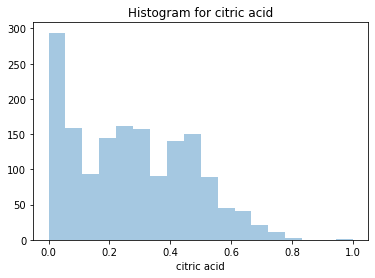

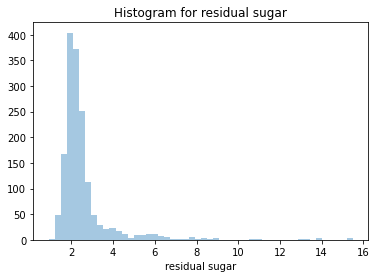

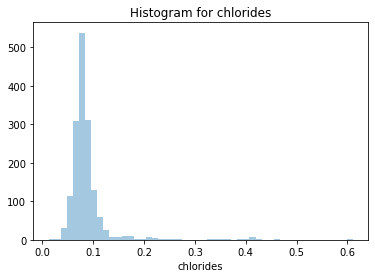

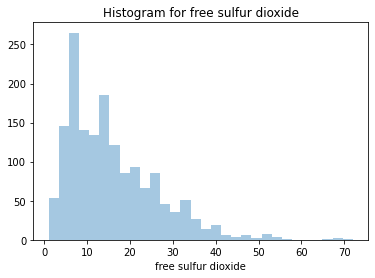

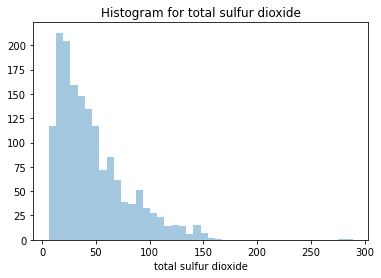

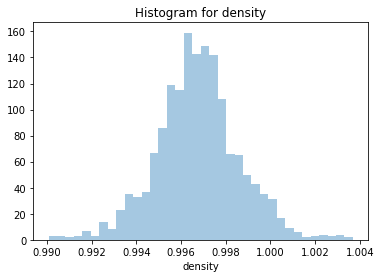

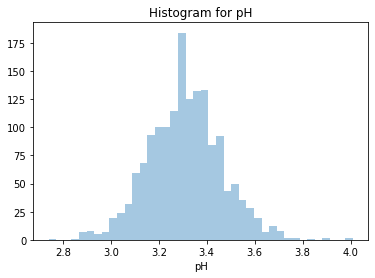

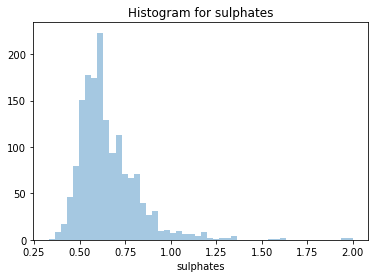

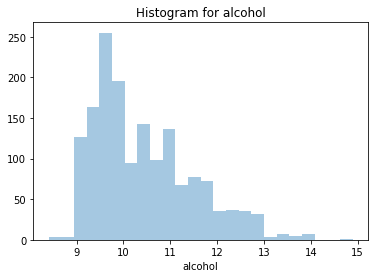

In [23]:
for feature in['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density'
         ,'pH', 'sulphates', 'alcohol']:
    sns.distplot(data[feature], kde=False)
    plt.title('Histogram for {}'.format(feature))
    plt.show()

except for density and pH, We can see that most our data are skewed to right and some have very long tail(residual sugar, chloride). by removing some outlier we might to be able to help to shape the data a little bit:

In [24]:
def detect_outlier(feature):
    outliers = []
    d = data[feature]
    mean = np.mean(d)
    std =np.std(d)
    
    
    for y in d:
        z_score= (y - mean)/std 
        if np.abs(z_score) > 3:
            outliers.append(y)
    print('\nOutlier caps for {}:'.format(feature))
    print('  --95p: {:.1f} / {} values exceed that'.format(d.quantile(.95),
                                                             len([i for i in d
                                                                  if i > d.quantile(.95)])))
    print('  --3sd: {:.1f} / {} values exceed that'.format(mean + 3*(std), len(outliers)))
    print('  --99p: {:.1f} / {} values exceed that'.format(d.quantile(.99),
                                                           len([i for i in d
                                                                if i > d.quantile(.99)])))
                                                   
  

In [25]:
# Determine what the upperbound should be for continuous features
for feat in ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density'
         ,'pH', 'sulphates', 'alcohol']:
    detect_outlier(feat)


Outlier caps for fixed acidity:
  --95p: 11.8 / 78 values exceed that
  --3sd: 13.5 / 12 values exceed that
  --99p: 13.3 / 14 values exceed that

Outlier caps for volatile acidity:
  --95p: 0.8 / 76 values exceed that
  --3sd: 1.1 / 10 values exceed that
  --99p: 1.0 / 15 values exceed that

Outlier caps for citric acid:
  --95p: 0.6 / 78 values exceed that
  --3sd: 0.9 / 1 values exceed that
  --99p: 0.7 / 16 values exceed that

Outlier caps for residual sugar:
  --95p: 5.1 / 79 values exceed that
  --3sd: 6.8 / 30 values exceed that
  --99p: 8.3 / 16 values exceed that

Outlier caps for chlorides:
  --95p: 0.1 / 80 values exceed that
  --3sd: 0.2 / 31 values exceed that
  --99p: 0.4 / 16 values exceed that

Outlier caps for free sulfur dioxide:
  --95p: 35.0 / 77 values exceed that
  --3sd: 47.2 / 22 values exceed that
  --99p: 50.0 / 16 values exceed that

Outlier caps for total sulfur dioxide:
  --95p: 112.1 / 80 values exceed that
  --3sd: 145.1 / 15 values exceed that
  --99p: 

we can can cap the 99 percentile to remove the influnce of the outlier in our future model:

In [26]:
# Cap features
def cap_features(feature):
    name = feature
    data[name].clip(upper=data[name].quantile(.99), inplace=True)


In [27]:
for feat in ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density'
         ,'pH', 'sulphates', 'alcohol']:
    cap_features(feat)

Now we can check the histograms again:

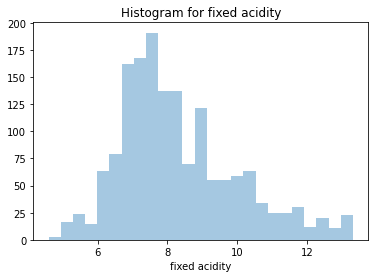

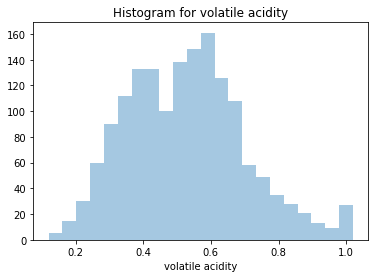

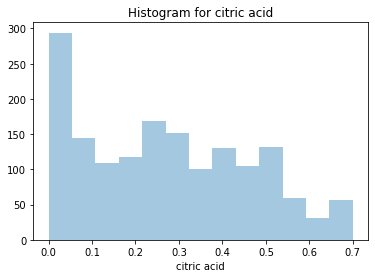

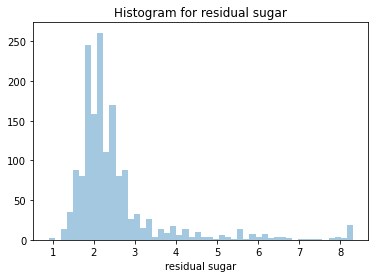

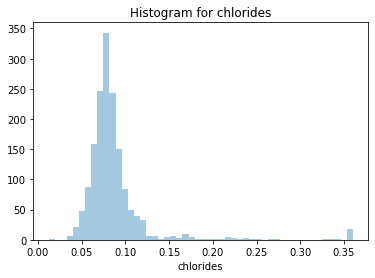

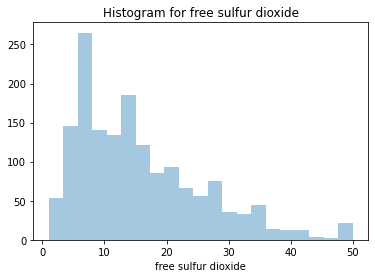

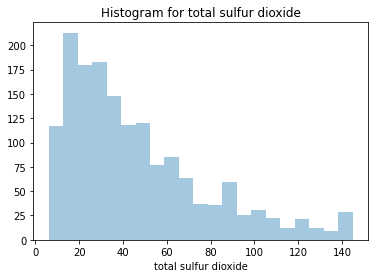

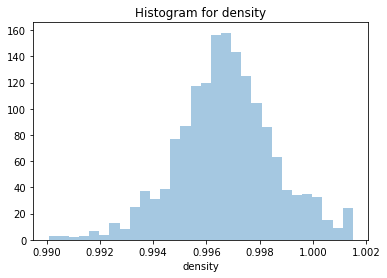

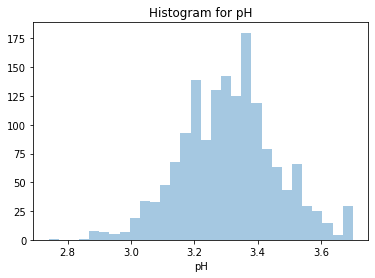

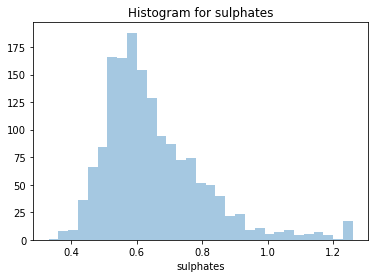

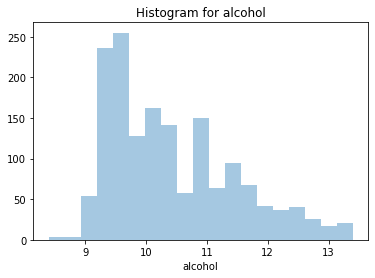

In [28]:
for feature in['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density'
         ,'pH', 'sulphates', 'alcohol']:
    sns.distplot(data[feature], kde=False)
    plt.title('Histogram for {}'.format(feature))
    plt.show()

we can see that removing outliers has shorten some of the long tails for some of the features but we need to do more transformations. for this purpose we use Box-Cox Power Transformation. 

### **Transforming Skewed Data**

#### QQ plotting for `fixed acidity`

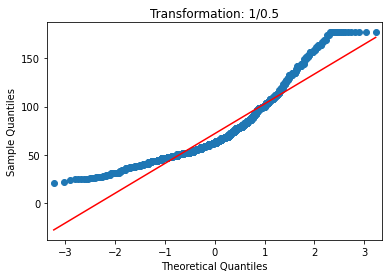

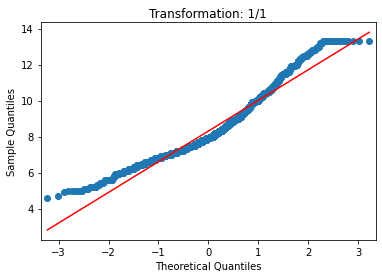

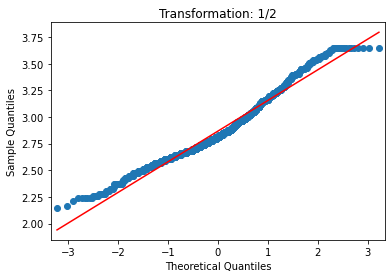

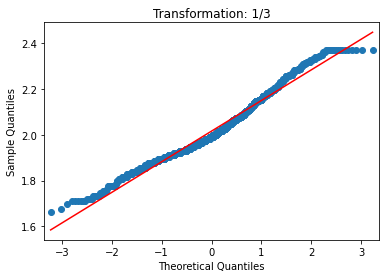

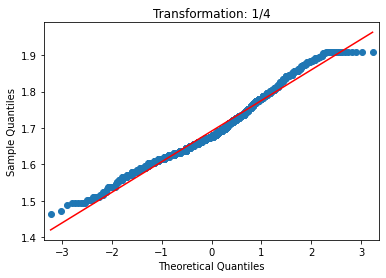

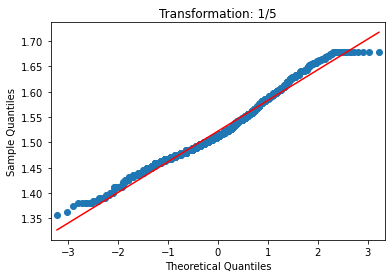

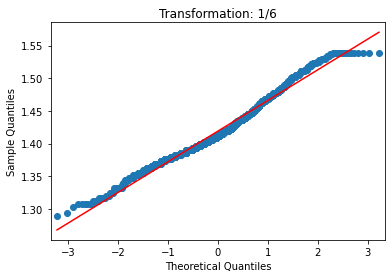

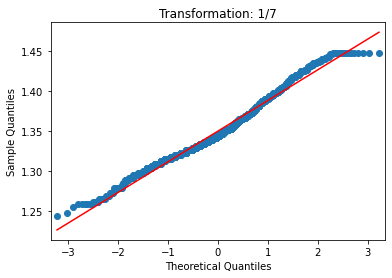

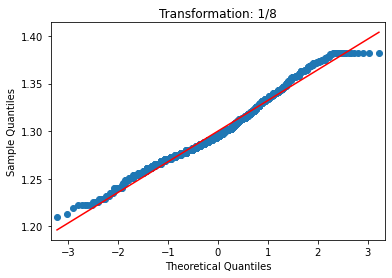

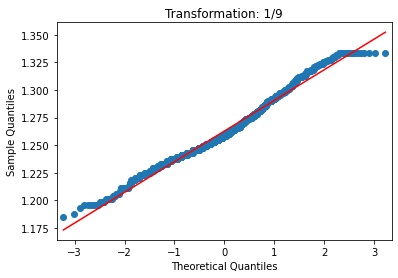

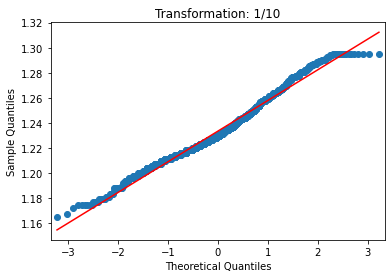

In [29]:
import matplotlib.pyplot as plt
import scipy.stats
from statsmodels.graphics.gofplots import qqplot
import seaborn as sns
%matplotlib inline

for i in [0.5, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]:
    data_t = data['fixed acidity']**(1/i)
    qqplot(data_t, line='s')
    plt.title("Transformation: 1/{}".format(str(i)))

We know that a perfect distribution is one where all of the points in the plot would end up in a straight line from the bottom left up to the top right. based on this definition, the prefect distribution for `fixed acidity` happens at 1/4 where the blue point align more close to the red line. based on this we can reduce the values for the histogram:

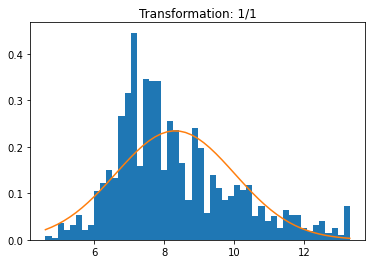

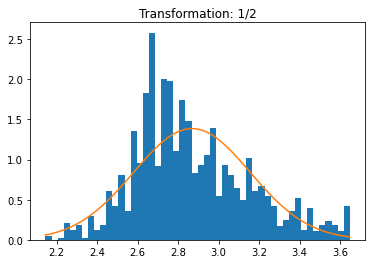

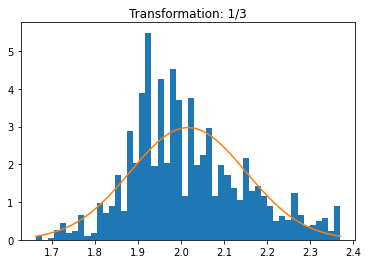

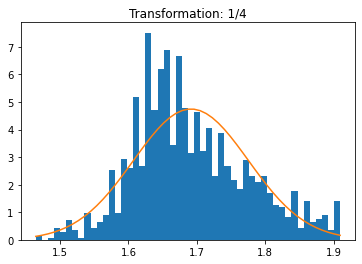

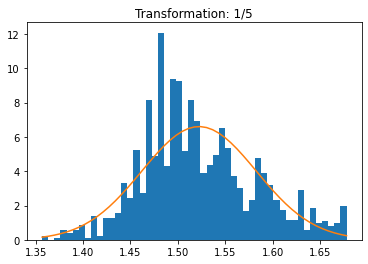

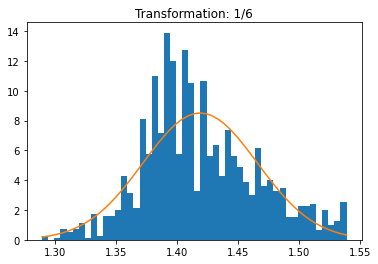

In [30]:
# Box-Cox transformation
for i in [1, 2, 3, 4, 5, 6]:
    data_t = data['fixed acidity']**(1/i)
    n, bins, patches = plt.hist(data_t, 50, density=True)
    mu = np.mean(data_t)
    sigma = np.std(data_t)
    plt.plot(bins, scipy.stats.norm.pdf(bins, mu, sigma))
    plt.title("Transformation: 1/{}".format(str(i)))
    plt.show()

from the graphs we can see that 1/3 is slightly better than 1/4, so we can save this one:

In [31]:
data['fixed acidity'] = data['fixed acidity'].apply(lambda x: x**(1/3))
data.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0       1.948695              0.70         0.00             1.9      0.076   
1       1.983192              0.88         0.00             2.6      0.098   
2       1.983192              0.76         0.04             2.3      0.092   
3       2.237378              0.28         0.56             1.9      0.075   
4       1.948695              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

#### QQ plotting for `volatile acidity`

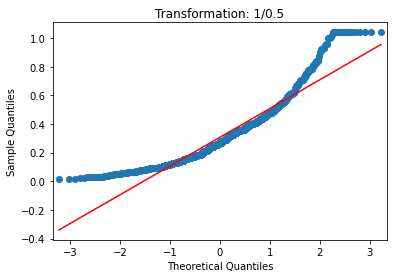

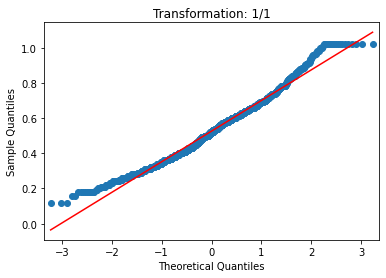

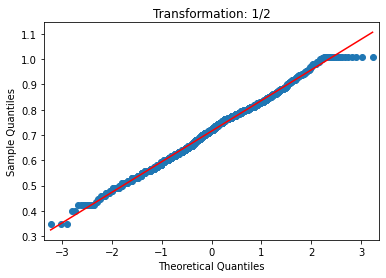

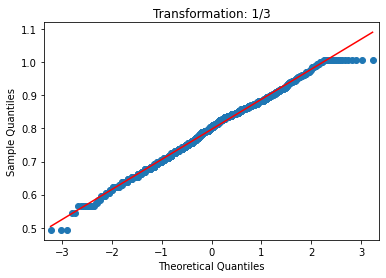

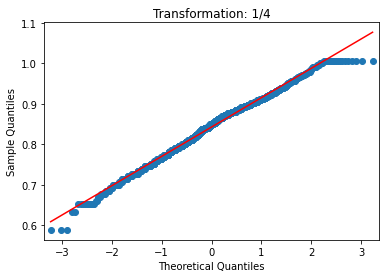

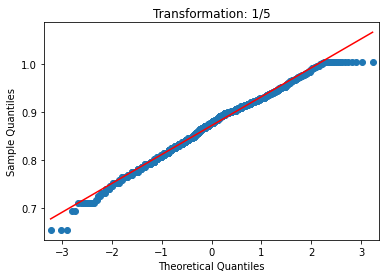

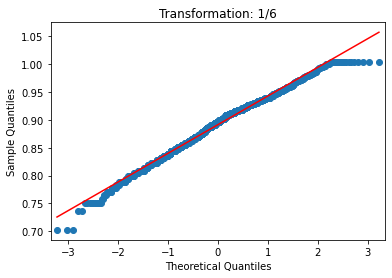

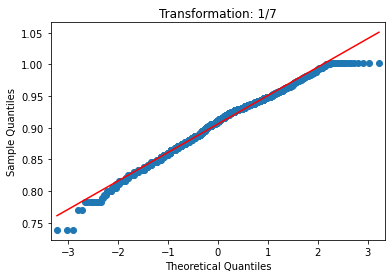

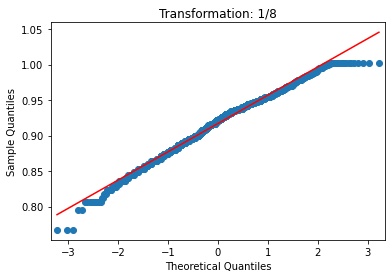

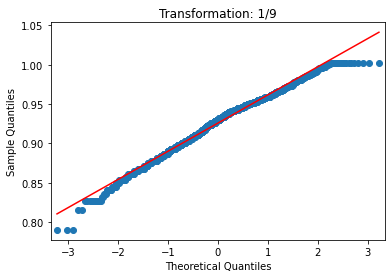

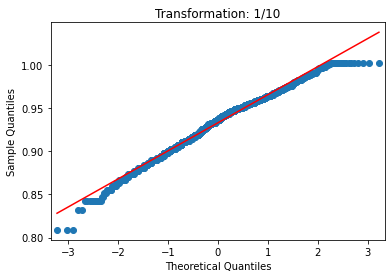

In [32]:
for i in [0.5, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]:
    data_t = data['volatile acidity']**(1/i)
    qqplot(data_t, line='s')
    plt.title("Transformation: 1/{}".format(str(i)))

 the prefect distribution for `volatile acidity` happens at 1/2 where the blue point align more close to the red line. based on this we can reduce the values for the histogram:

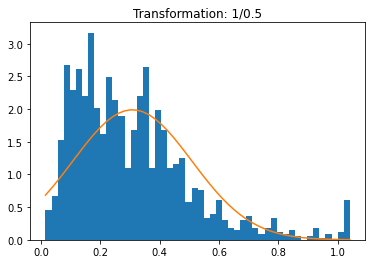

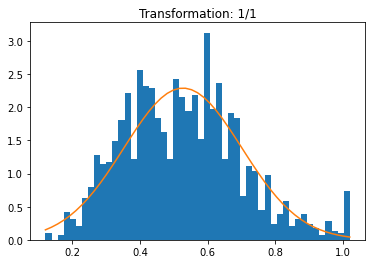

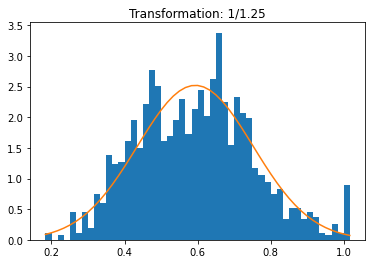

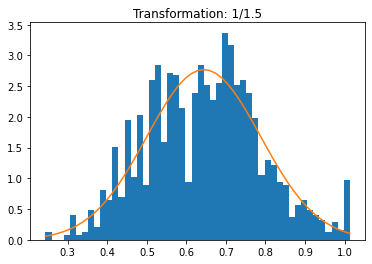

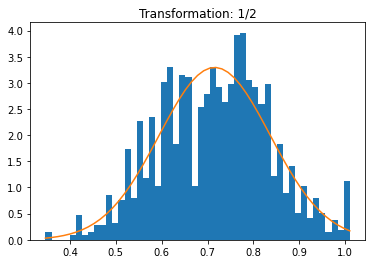

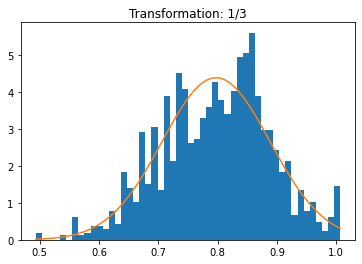

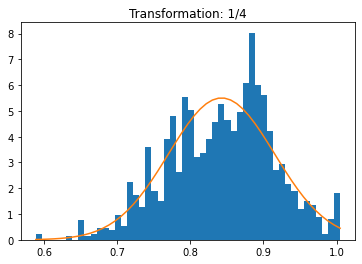

In [33]:
# Box-Cox transformation
for i in [0.5, 1, 1.25, 1.5, 2, 3, 4]:
    data_t = data['volatile acidity']**(1/i)
    n, bins, patches = plt.hist(data_t, 50, density=True)
    mu = np.mean(data_t)
    sigma = np.std(data_t)
    plt.plot(bins, scipy.stats.norm.pdf(bins, mu, sigma))
    plt.title("Transformation: 1/{}".format(str(i)))
    plt.show()

from the graphs we can see that 1/1.25 is actually better than 1/2, so we can save this one:

In [34]:
data['volatile acidity'] = data['volatile acidity'].apply(lambda x: x**(1/1.25))
data.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0       1.948695          0.751759         0.00             1.9      0.076   
1       1.983192          0.902789         0.00             2.6      0.098   
2       1.983192          0.802880         0.04             2.3      0.092   
3       2.237378          0.361182         0.56             1.9      0.075   
4       1.948695          0.751759         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

#### QQ plotting for `citric acid`

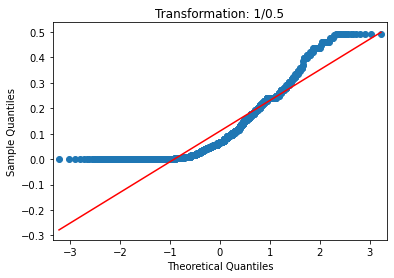

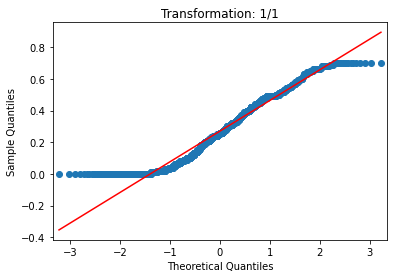

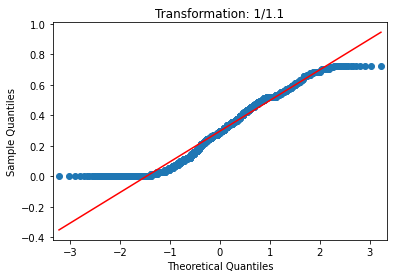

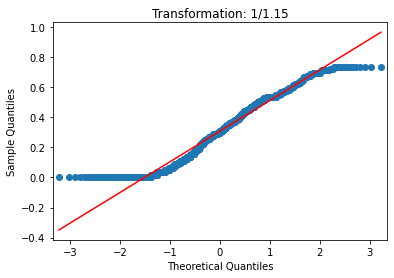

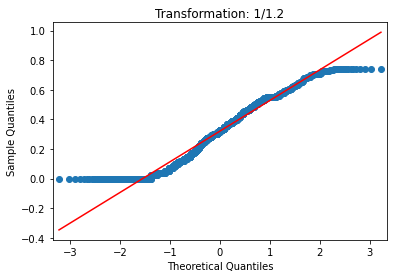

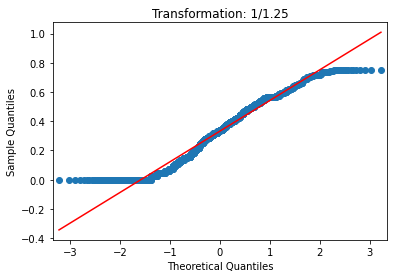

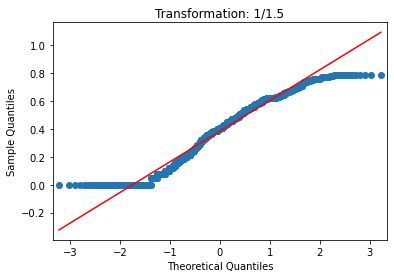

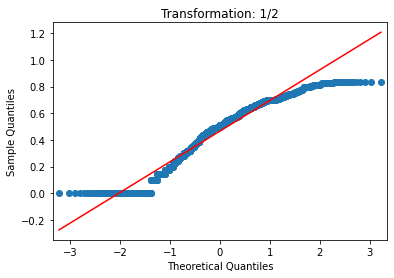

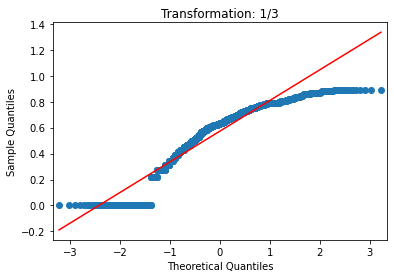

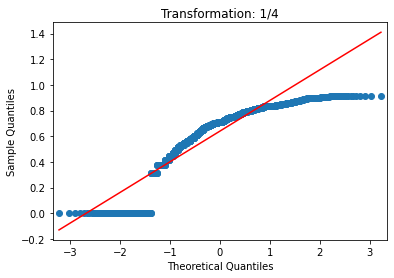

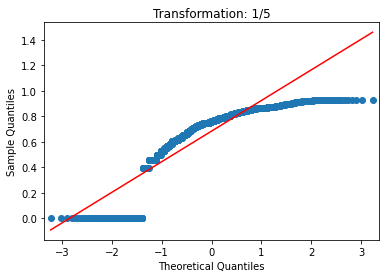

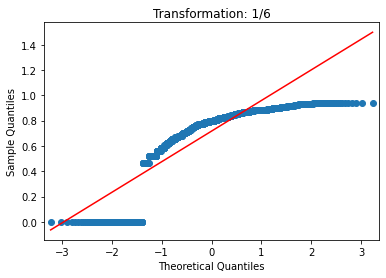

In [35]:
for i in [0.5, 1, 1.1, 1.15, 1.2, 1.25, 1.5, 2, 3, 4, 5, 6]:
    data_t = data['citric acid']**(1/i)
    qqplot(data_t, line='s')
    plt.title("Transformation: 1/{}".format(str(i)))

the prefect distribution for `citric acid` happens at 1/1.15 where the blue point align more close to the red line. based on this we can reduce the values for the histogram:

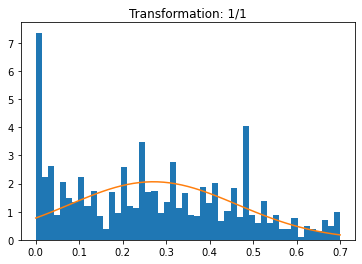

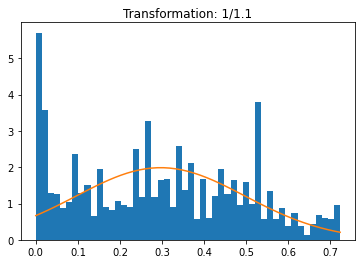

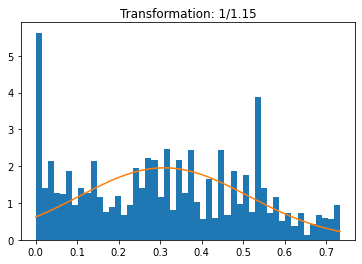

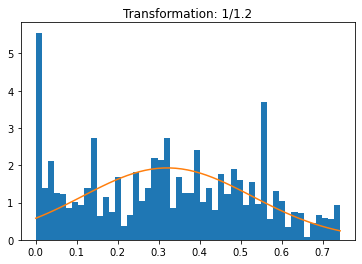

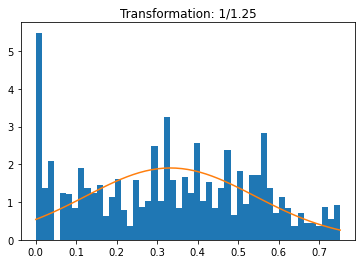

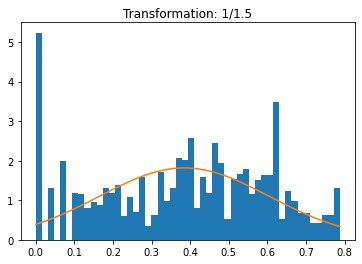

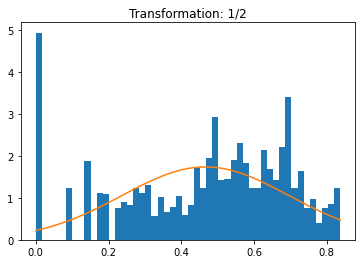

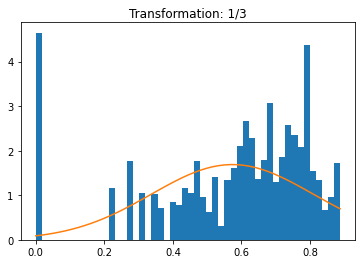

In [36]:
# Box-Cox transformation
for i in [1, 1.1, 1.15, 1.2, 1.25, 1.5, 2, 3]:
    data_t = data['citric acid']**(1/i)
    n, bins, patches = plt.hist(data_t, 50, density=True)
    mu = np.mean(data_t)
    sigma = np.std(data_t)
    plt.plot(bins, scipy.stats.norm.pdf(bins, mu, sigma))
    plt.title("Transformation: 1/{}".format(str(i)))
    plt.show()

from the graphs we can see that 1/1.15 follows a better distribution so we can save this one:

In [37]:
data['citric acid'] = data['citric acid'].apply(lambda x: x**(1/1.15))
data.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0       1.948695          0.751759     0.000000             1.9      0.076   
1       1.983192          0.902789     0.000000             2.6      0.098   
2       1.983192          0.802880     0.060870             2.3      0.092   
3       2.237378          0.361182     0.603995             1.9      0.075   
4       1.948695          0.751759     0.000000             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

#### QQ plotting for `residual sugar`

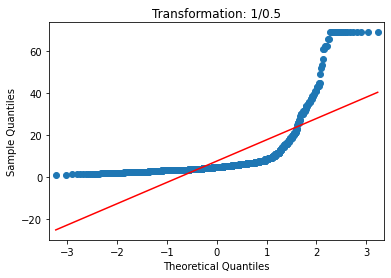

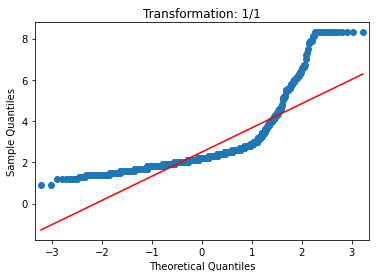

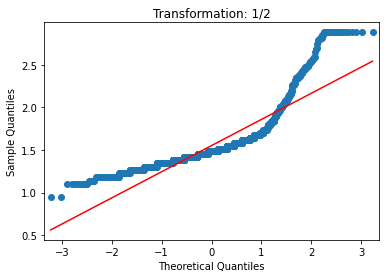

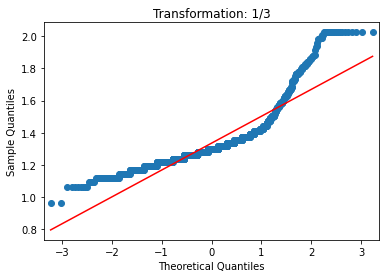

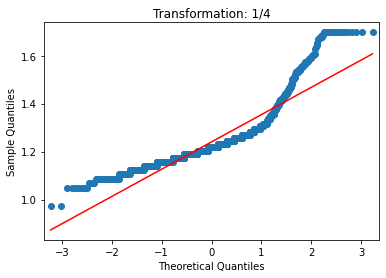

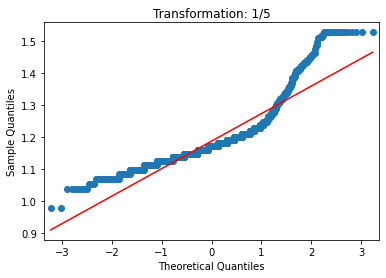

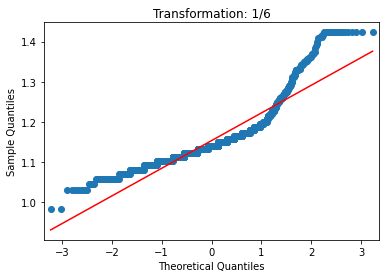

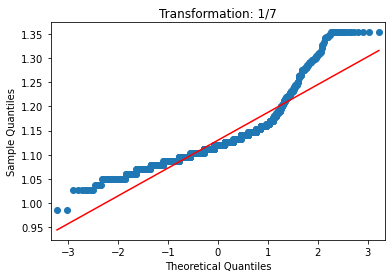

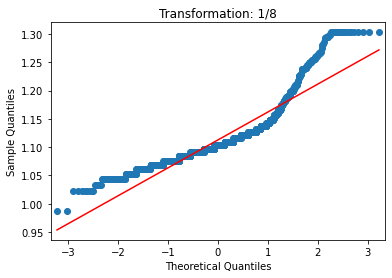

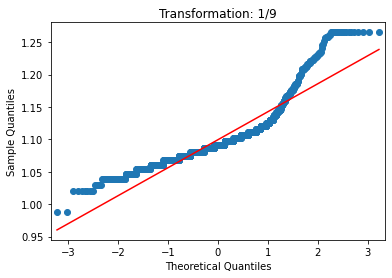

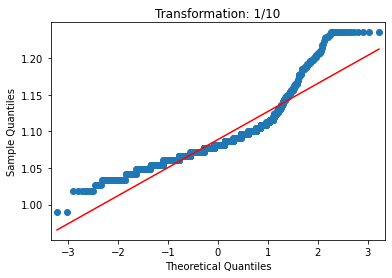

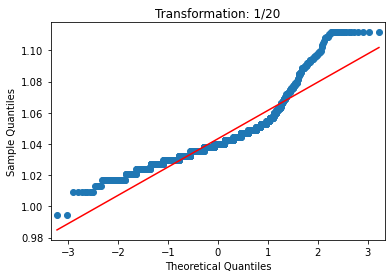

In [38]:
for i in [0.5, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20]:
    data_t = data['residual sugar']**(1/i)
    qqplot(data_t, line='s')
    plt.title("Transformation: 1/{}".format(str(i)))

it is note very clear but the best distribution for `residual sugar` happens at 1/3 where the blue point align more close to the red line. based on this we can reduce the values for the histogram:

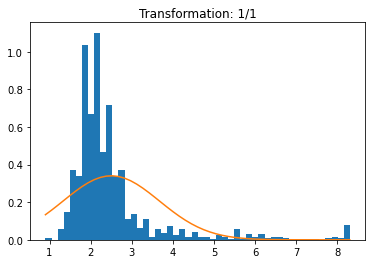

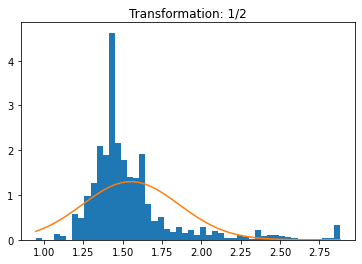

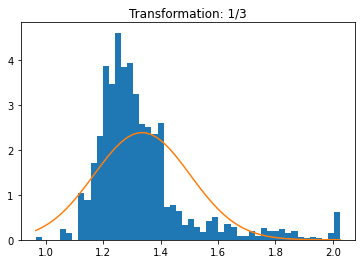

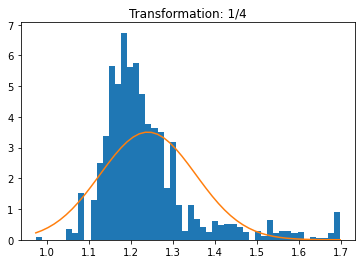

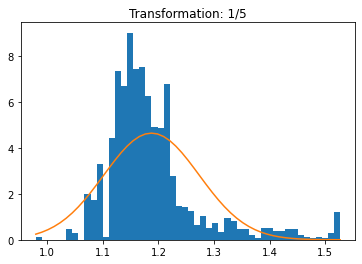

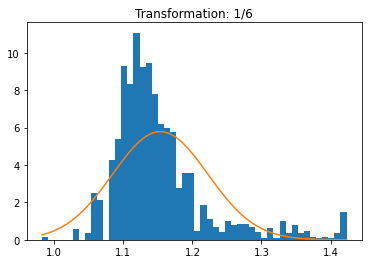

In [39]:
# Box-Cox transformation
for i in [1, 2, 3, 4, 5, 6]:
    data_t = data['residual sugar']**(1/i)
    n, bins, patches = plt.hist(data_t, 50, density=True)
    mu = np.mean(data_t)
    sigma = np.std(data_t)
    plt.plot(bins, scipy.stats.norm.pdf(bins, mu, sigma))
    plt.title("Transformation: 1/{}".format(str(i)))
    plt.show()

from the graphs we can see that 1/3 than rest even though we still have a long tail, so we can save this one:

In [40]:
data['residual sugar'] = data['residual sugar'].apply(lambda x: x**(1/3))
data.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0       1.948695          0.751759     0.000000        1.238562      0.076   
1       1.983192          0.902789     0.000000        1.375069      0.098   
2       1.983192          0.802880     0.060870        1.320006      0.092   
3       2.237378          0.361182     0.603995        1.238562      0.075   
4       1.948695          0.751759     0.000000        1.238562      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

#### QQ plotting for `chlorides`

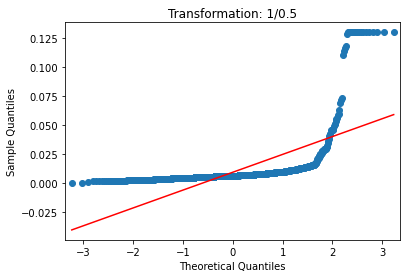

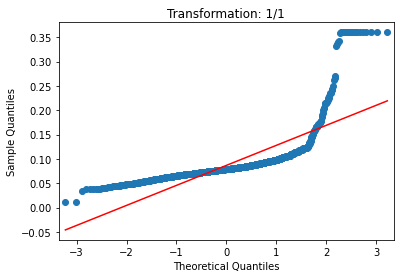

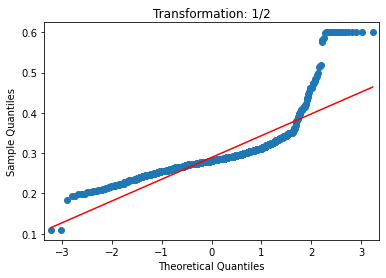

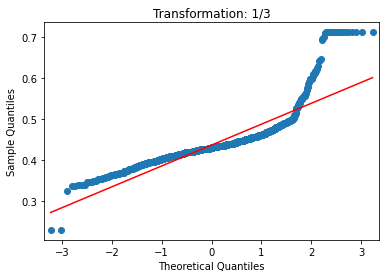

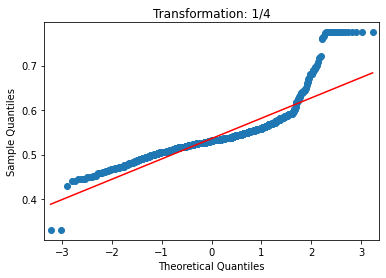

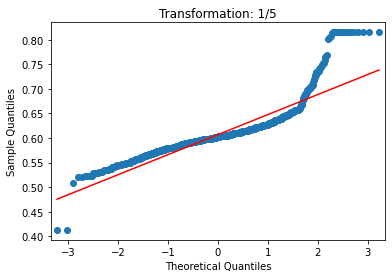

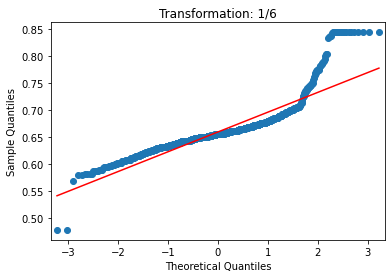

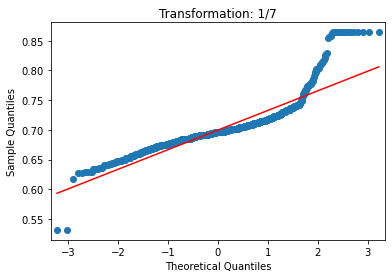

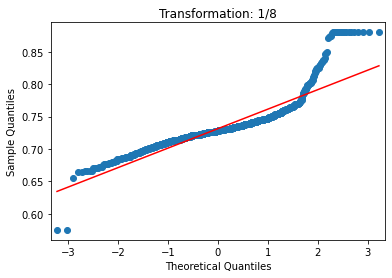

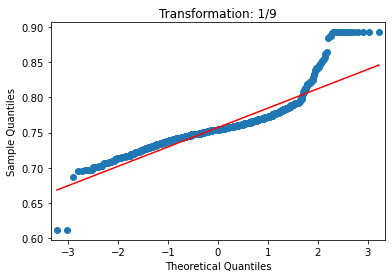

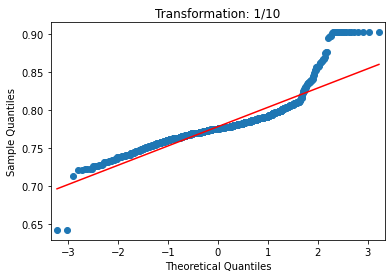

In [41]:
for i in [0.5, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]:
    data_t = data['chlorides']**(1/i)
    qqplot(data_t, line='s')
    plt.title("Transformation: 1/{}".format(str(i)))

the best distribution for `chlorides` happens at 1/2 where the blue point align more close to the red line. based on this we can reduce the values for the histogram:

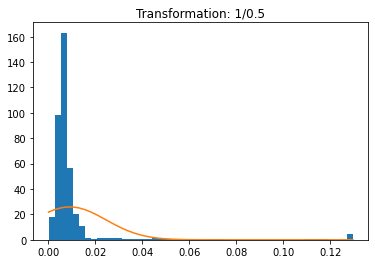

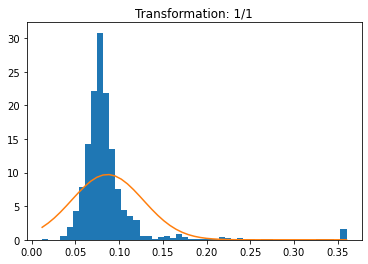

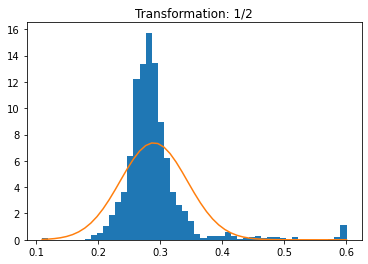

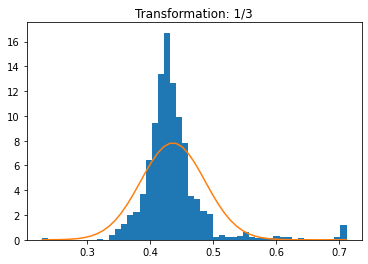

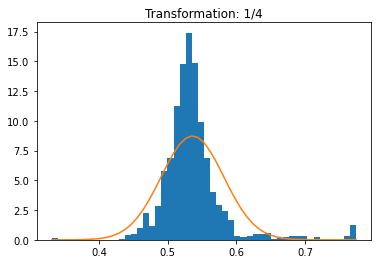

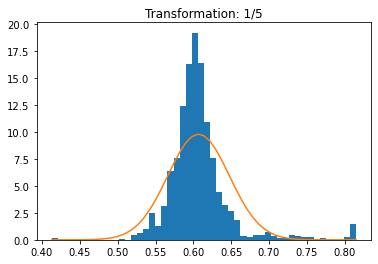

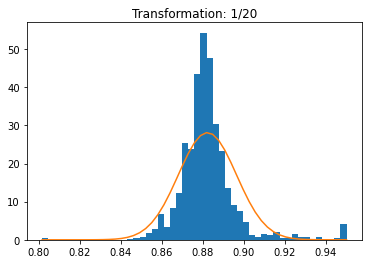

In [42]:
# Box-Cox transformation
for i in [0.5, 1, 2, 3, 4, 5, 20]:
    data_t = data['chlorides']**(1/i)
    n, bins, patches = plt.hist(data_t, 50, density=True)
    mu = np.mean(data_t)
    sigma = np.std(data_t)
    plt.plot(bins, scipy.stats.norm.pdf(bins, mu, sigma))
    plt.title("Transformation: 1/{}".format(str(i)))
    plt.show()

from the graphs we can see that 1/4 is better than 1/2, so we can save this one:

In [43]:
data['chlorides'] = data['chlorides'].apply(lambda x: x**(1/4))
data.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0       1.948695          0.751759     0.000000        1.238562   0.525053   
1       1.983192          0.902789     0.000000        1.375069   0.559508   
2       1.983192          0.802880     0.060870        1.320006   0.550740   
3       2.237378          0.361182     0.603995        1.238562   0.523318   
4       1.948695          0.751759     0.000000        1.238562   0.525053   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

#### QQ plotting for `free sulfur dioxide`

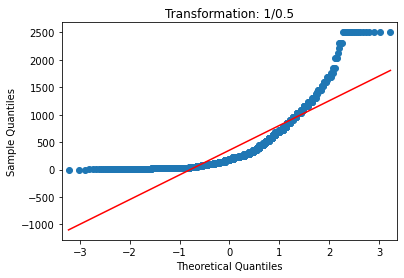

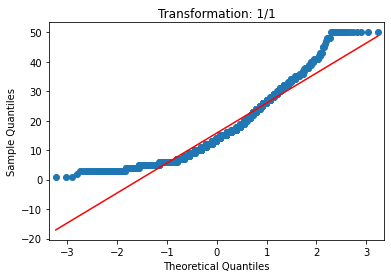

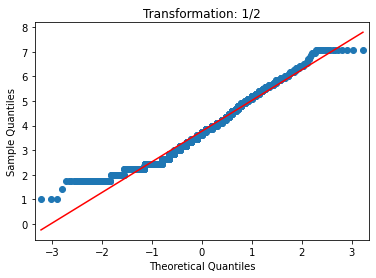

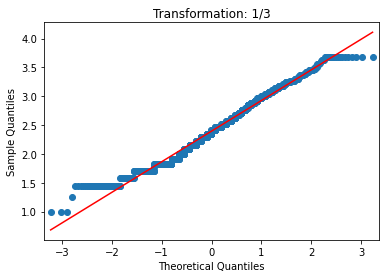

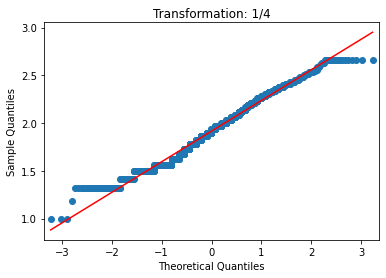

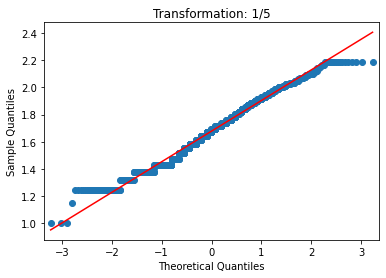

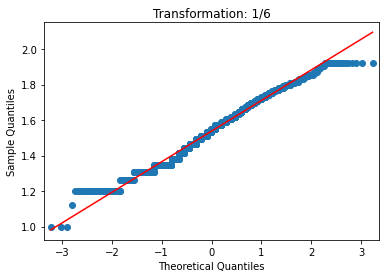

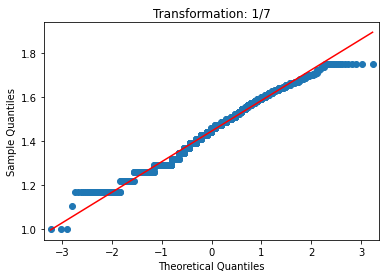

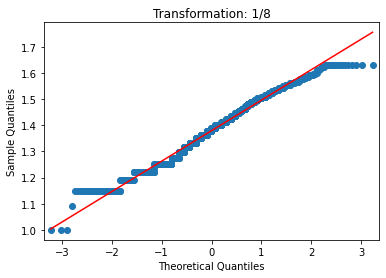

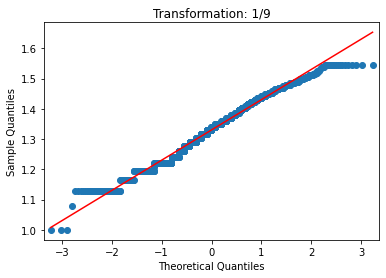

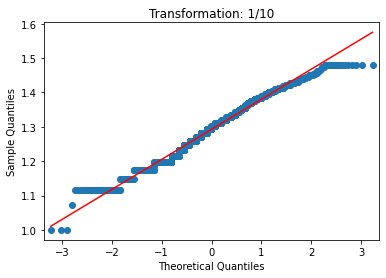

In [44]:
for i in [0.5, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]:
    data_t = data['free sulfur dioxide']**(1/i)
    qqplot(data_t, line='s')
    plt.title("Transformation: 1/{}".format(str(i)))

the best distribution for `free sulfur dioxide` happens at 1/4 where the blue point align more close to the red line. based on this we can reduce the values for the histogram:

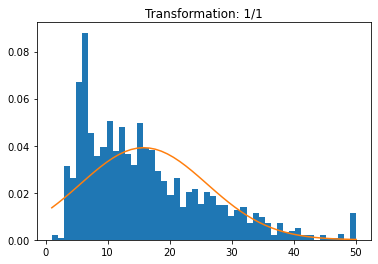

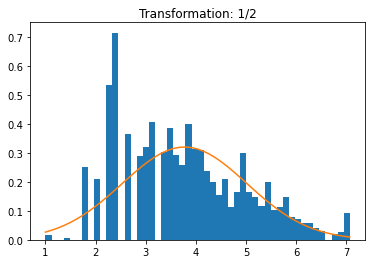

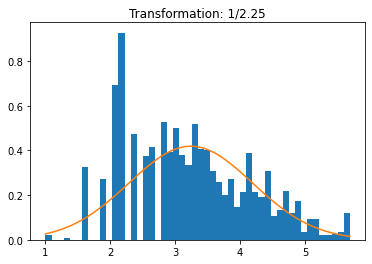

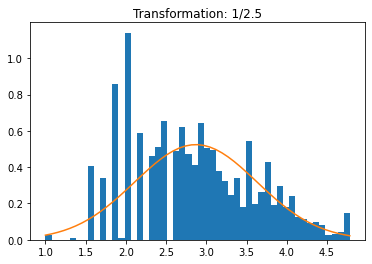

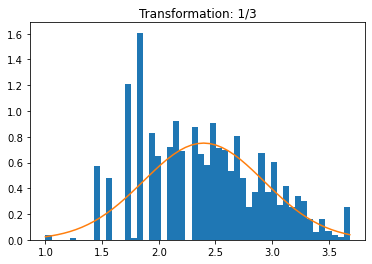

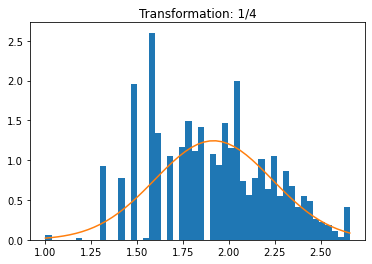

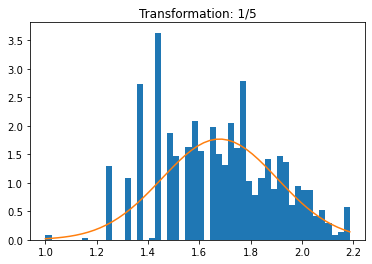

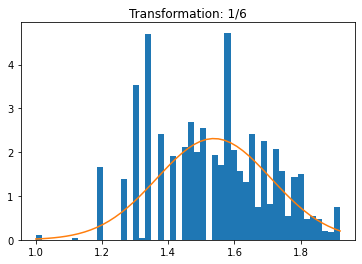

In [45]:
# Box-Cox transformation
for i in [1, 2, 2.25, 2.5, 3, 4, 5, 6]:
    data_t = data['free sulfur dioxide']**(1/i)
    n, bins, patches = plt.hist(data_t, 50, density=True)
    mu = np.mean(data_t)
    sigma = np.std(data_t)
    plt.plot(bins, scipy.stats.norm.pdf(bins, mu, sigma))
    plt.title("Transformation: 1/{}".format(str(i)))
    plt.show()

after few tries, from the graphs we can see that 1/2.25 is slightly better than 1/4, so we can save this one:

In [46]:
data['free sulfur dioxide'] = data['free sulfur dioxide'].apply(lambda x: x**(1/2.25))
data.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0       1.948695          0.751759     0.000000        1.238562   0.525053   
1       1.983192          0.902789     0.000000        1.375069   0.559508   
2       1.983192          0.802880     0.060870        1.320006   0.550740   
3       2.237378          0.361182     0.603995        1.238562   0.523318   
4       1.948695          0.751759     0.000000        1.238562   0.525053   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0             2.902961                  34.0   0.9978  3.51       0.56   
1             4.181255                  67.0   0.9968  3.20       0.68   
2             3.332017                  54.0   0.9970  3.26       0.65   
3             3.522623                  60.0   0.9980  3.16       0.58   
4             2.902961                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

#### QQ plotting for `total sulfur dioxide`

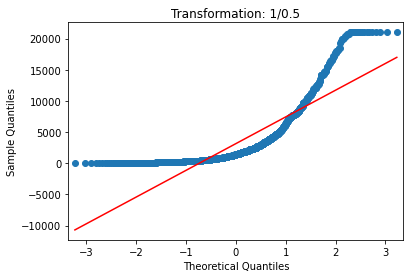

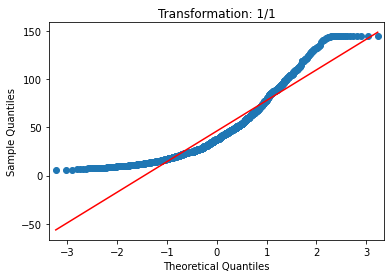

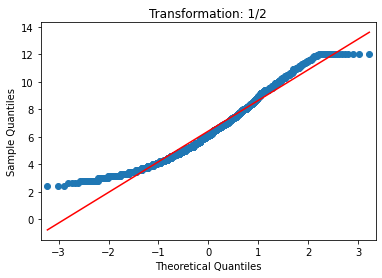

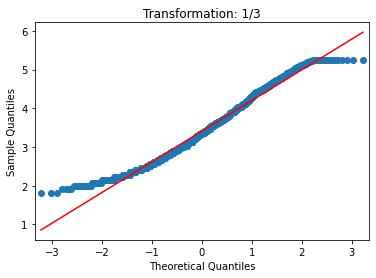

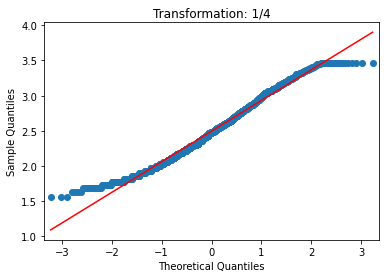

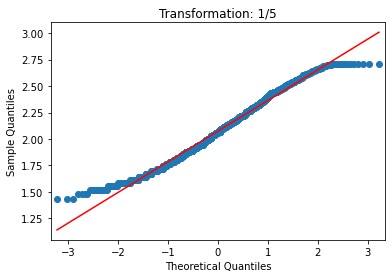

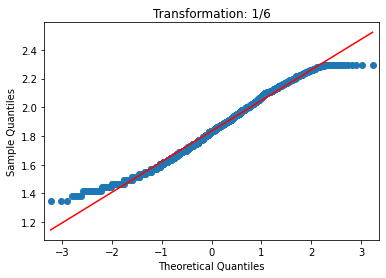

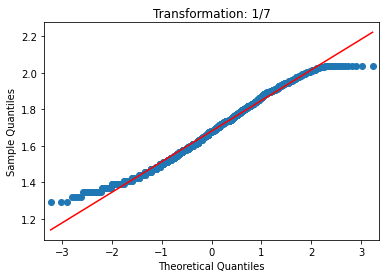

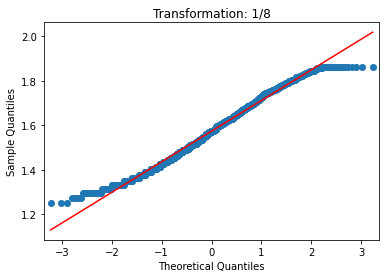

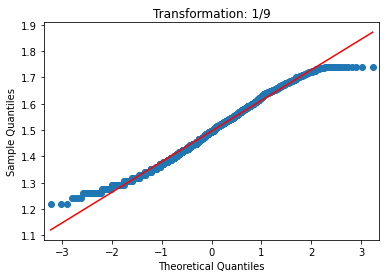

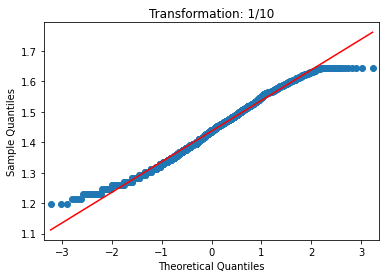

In [47]:
for i in [0.5, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]:
    data_t = data['total sulfur dioxide']**(1/i)
    qqplot(data_t, line='s')
    plt.title("Transformation: 1/{}".format(str(i)))

the best distribution for `total sulfur dioxide` happens at 1/4 where the blue point align more close to the red line. based on this we can reduce the values for the histogram:

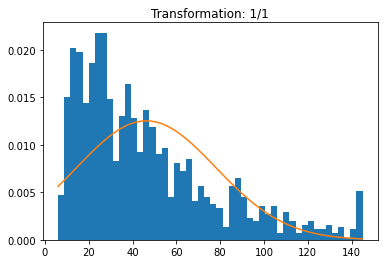

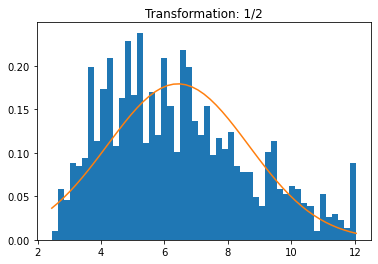

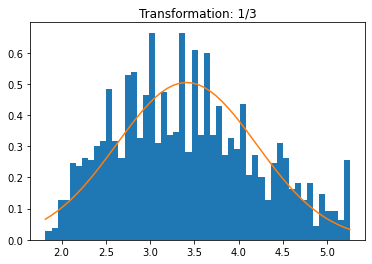

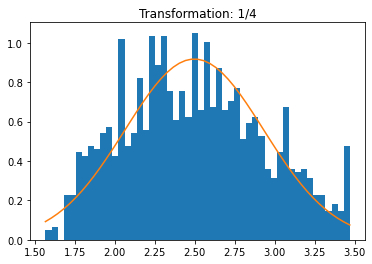

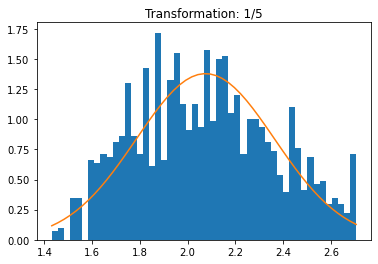

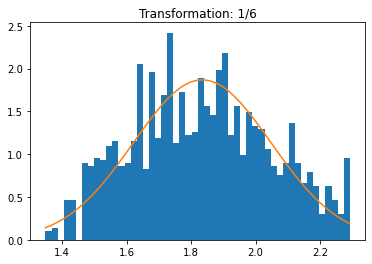

In [48]:
# Box-Cox transformation
for i in [1, 2, 3, 4, 5, 6]:
    data_t = data['total sulfur dioxide']**(1/i)
    n, bins, patches = plt.hist(data_t, 50, density=True)
    mu = np.mean(data_t)
    sigma = np.std(data_t)
    plt.plot(bins, scipy.stats.norm.pdf(bins, mu, sigma))
    plt.title("Transformation: 1/{}".format(str(i)))
    plt.show()

from the graphs we can see that 1/4 is a good choice, so we can save this one:

In [49]:
data['total sulfur dioxide'] = data['total sulfur dioxide'].apply(lambda x: x**(1/4))
data.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0       1.948695          0.751759     0.000000        1.238562   0.525053   
1       1.983192          0.902789     0.000000        1.375069   0.559508   
2       1.983192          0.802880     0.060870        1.320006   0.550740   
3       2.237378          0.361182     0.603995        1.238562   0.523318   
4       1.948695          0.751759     0.000000        1.238562   0.525053   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0             2.902961              2.414736   0.9978  3.51       0.56   
1             4.181255              2.861006   0.9968  3.20       0.68   
2             3.332017              2.710806   0.9970  3.26       0.65   
3             3.522623              2.783158   0.9980  3.16       0.58   
4             2.902961              2.414736   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

#### QQ plotting for `density`

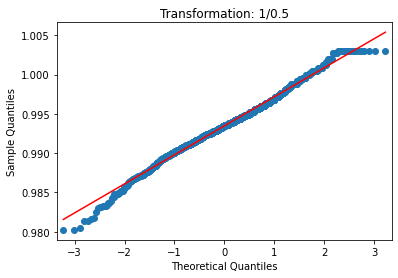

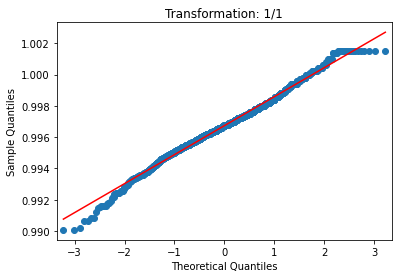

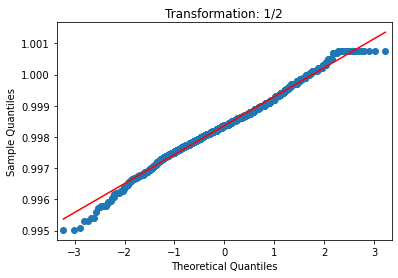

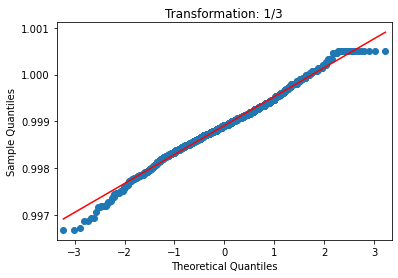

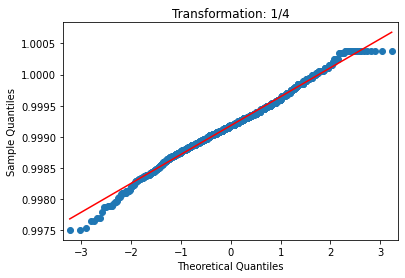

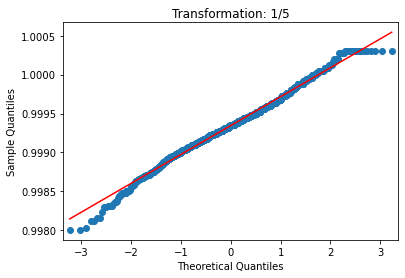

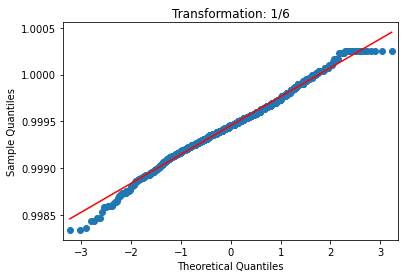

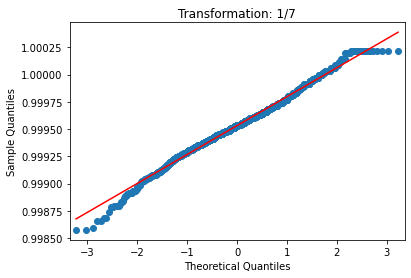

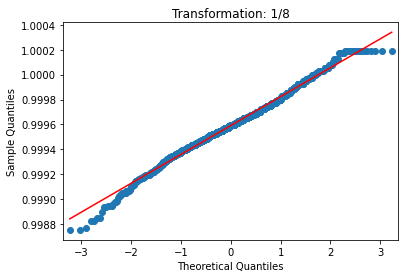

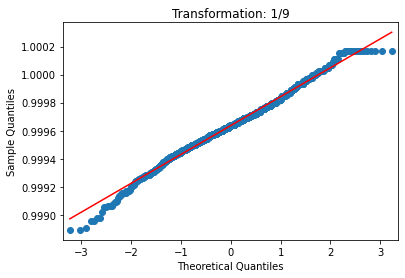

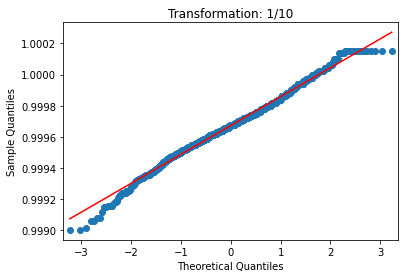

In [50]:
for i in [0.5, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]:
    data_t = data['density']**(1/i)
    qqplot(data_t, line='s')
    plt.title("Transformation: 1/{}".format(str(i)))

it is not very clear which is the best distribution for `density`. specially since density seemed to follow the normal distribution already in the previous histograms. we can check few histograms to see if there is one that might improve this feature even if slightly:

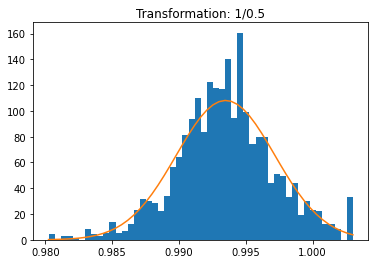

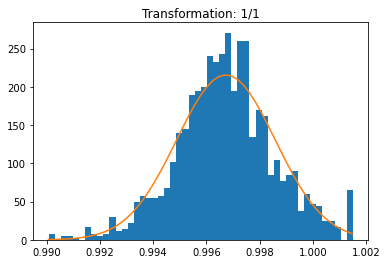

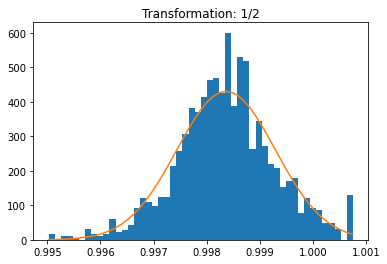

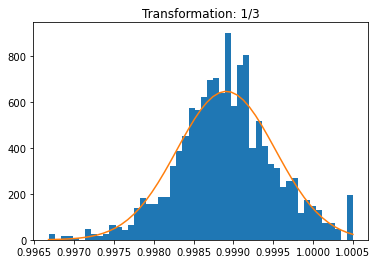

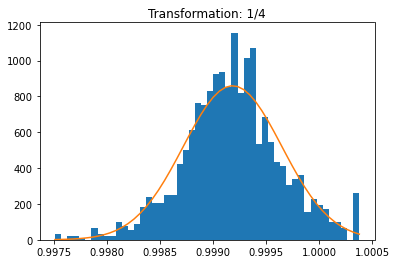

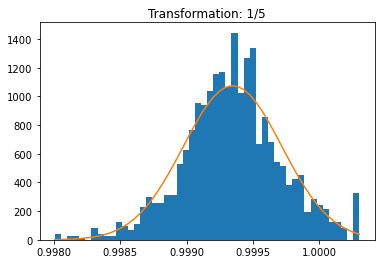

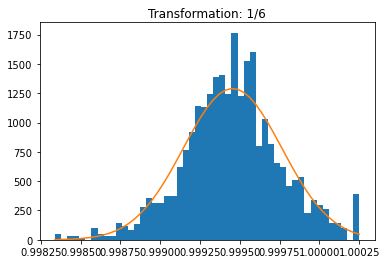

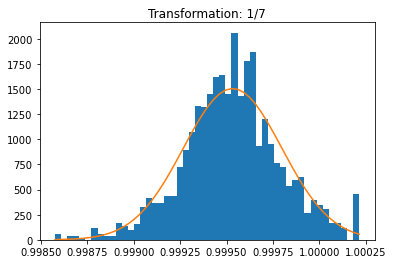

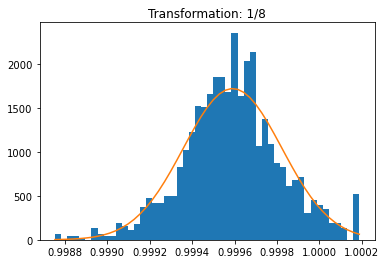

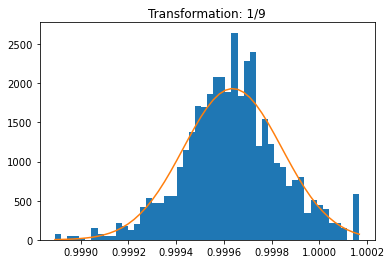

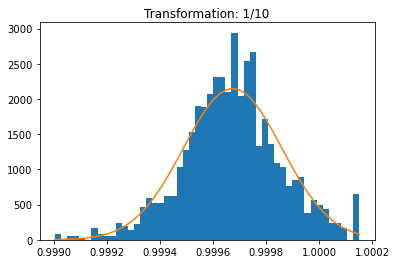

In [51]:
# Box-Cox transformation
for i in [0.5, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]:
    data_t = data['density']**(1/i)
    n, bins, patches = plt.hist(data_t, 50, density=True)
    mu = np.mean(data_t)
    sigma = np.std(data_t)
    plt.plot(bins, scipy.stats.norm.pdf(bins, mu, sigma))
    plt.title("Transformation: 1/{}".format(str(i)))
    plt.show()

we can see that none  of them actually improve the distribution for density so we leave it as is, 

In [52]:
data['density'] = data['density'].apply(lambda x: x**(1/1))
data.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0       1.948695          0.751759     0.000000        1.238562   0.525053   
1       1.983192          0.902789     0.000000        1.375069   0.559508   
2       1.983192          0.802880     0.060870        1.320006   0.550740   
3       2.237378          0.361182     0.603995        1.238562   0.523318   
4       1.948695          0.751759     0.000000        1.238562   0.525053   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0             2.902961              2.414736   0.9978  3.51       0.56   
1             4.181255              2.861006   0.9968  3.20       0.68   
2             3.332017              2.710806   0.9970  3.26       0.65   
3             3.522623              2.783158   0.9980  3.16       0.58   
4             2.902961              2.414736   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

#### QQ plotting for `pH`

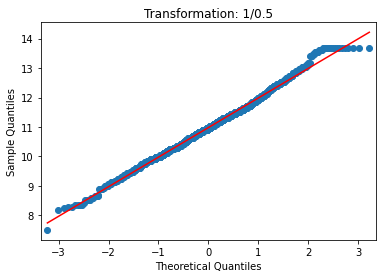

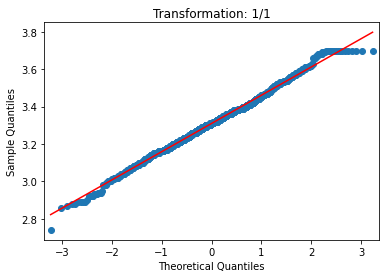

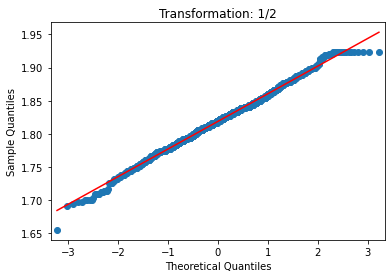

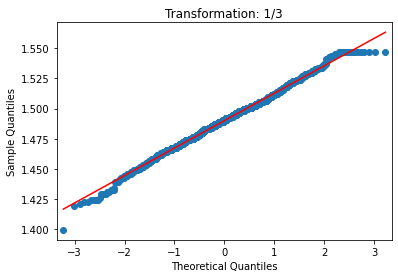

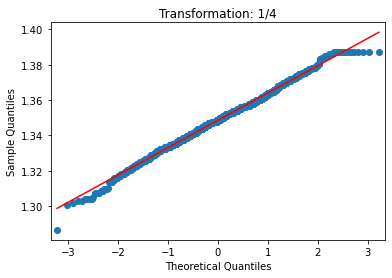

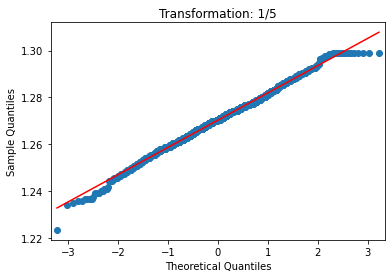

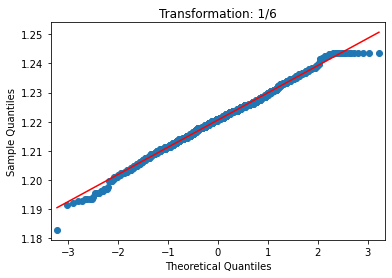

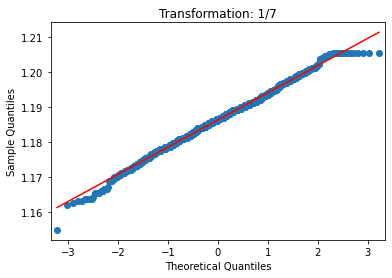

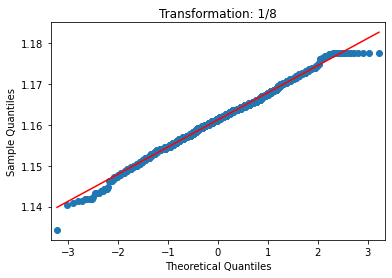

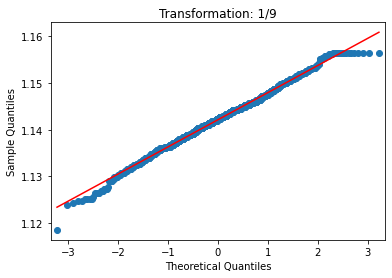

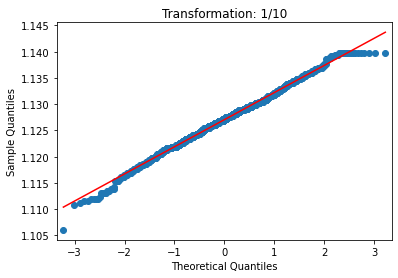

In [53]:
for i in [0.5, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]:
    data_t = data['pH']**(1/i)
    qqplot(data_t, line='s')
    plt.title("Transformation: 1/{}".format(str(i)))

the best distribution for `pH` happens at 1/0.5 where the blue point align more close to the red line. based on this we can reduce the values for the histogram:

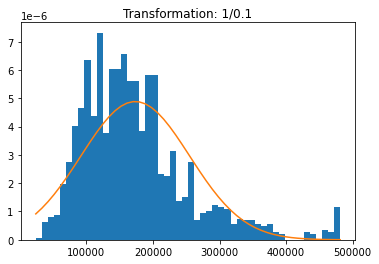

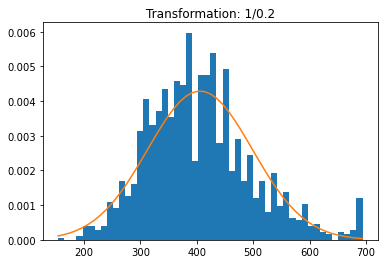

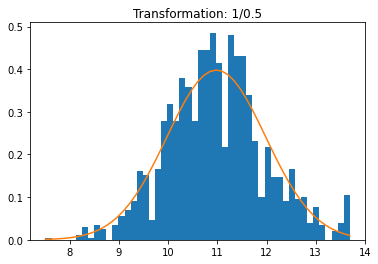

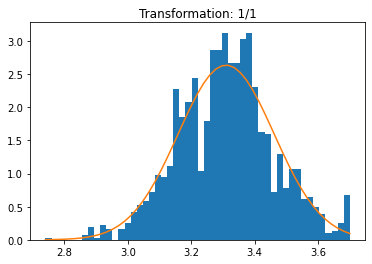

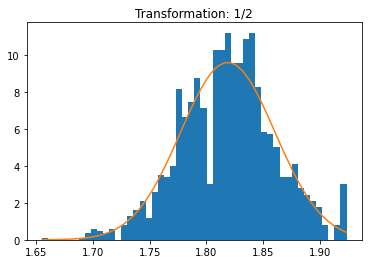

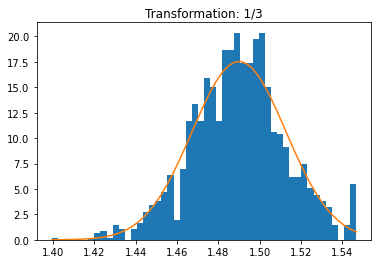

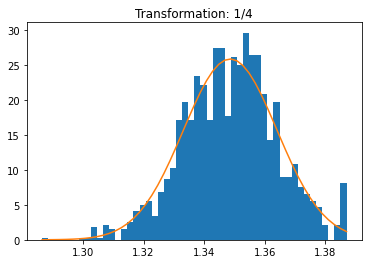

In [54]:
# Box-Cox transformation
for i in [0.1, 0.2, 0.5, 1, 2, 3, 4]:
    data_t = data['pH']**(1/i)
    n, bins, patches = plt.hist(data_t, 50, density=True)
    mu = np.mean(data_t)
    sigma = np.std(data_t)
    plt.plot(bins, scipy.stats.norm.pdf(bins, mu, sigma))
    plt.title("Transformation: 1/{}".format(str(i)))
    plt.show()

from the graphs we can see that 1/0.2 is slightly better than 1/0.5, so we can save this one:

In [55]:
data['pH'] = data['pH'].apply(lambda x: x**(1/0.2))
data.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0       1.948695          0.751759     0.000000        1.238562   0.525053   
1       1.983192          0.902789     0.000000        1.375069   0.559508   
2       1.983192          0.802880     0.060870        1.320006   0.550740   
3       2.237378          0.361182     0.603995        1.238562   0.523318   
4       1.948695          0.751759     0.000000        1.238562   0.525053   

   free sulfur dioxide  total sulfur dioxide  density          pH  sulphates  \
0             2.902961              2.414736   0.9978  532.764873       0.56   
1             4.181255              2.861006   0.9968  335.544320       0.68   
2             3.332017              2.710806   0.9970  368.203575       0.65   
3             3.522623              2.783158   0.9980  315.090575       0.58   
4             2.902961              2.414736   0.9978  532.764873       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

#### QQ plotting for `sulphates`

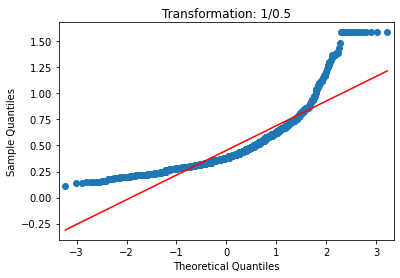

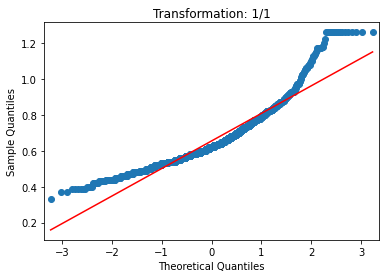

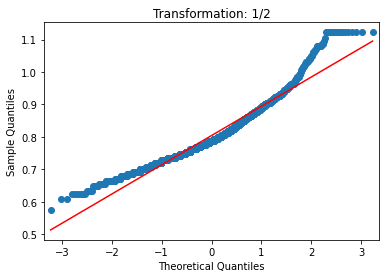

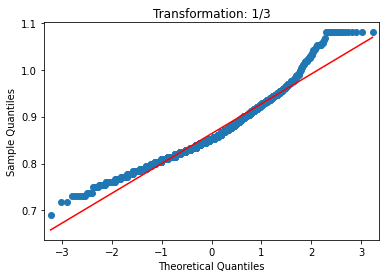

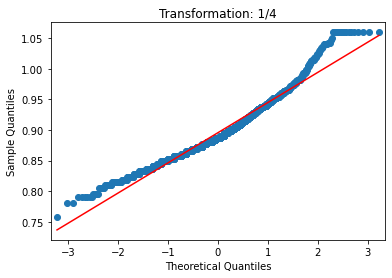

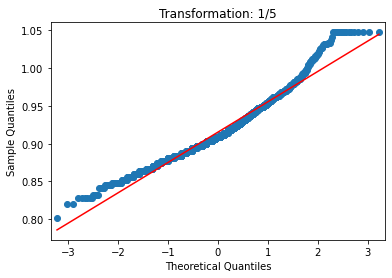

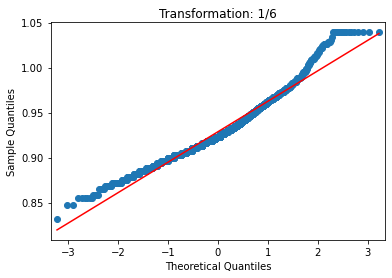

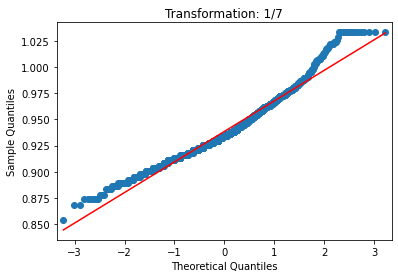

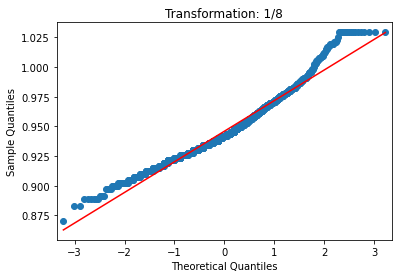

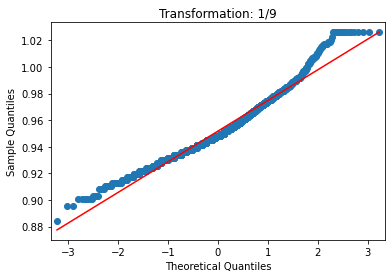

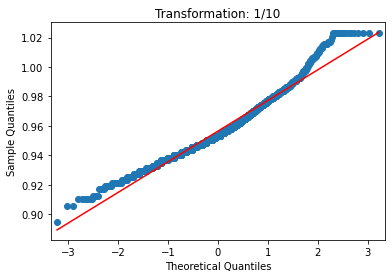

In [56]:
for i in [0.5, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]:
    data_t = data['sulphates']**(1/i)
    qqplot(data_t, line='s')
    plt.title("Transformation: 1/{}".format(str(i)))

the best distribution for `sulphates` happens at 1/3 where the blue point align more close to the red line. based on this we can reduce the values for the histogram:

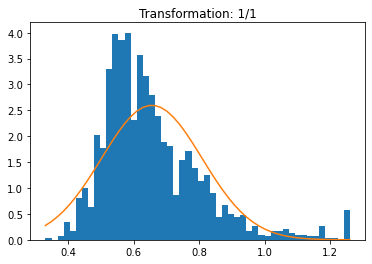

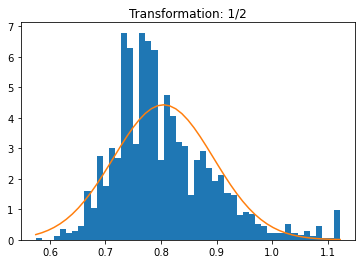

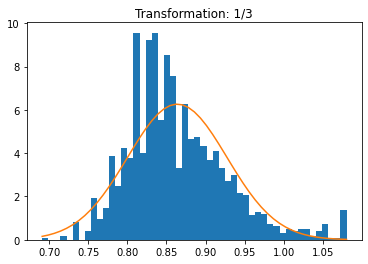

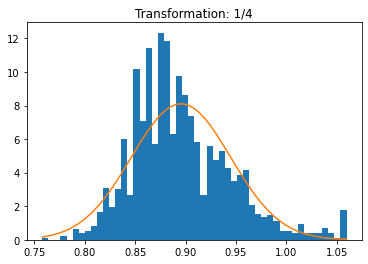

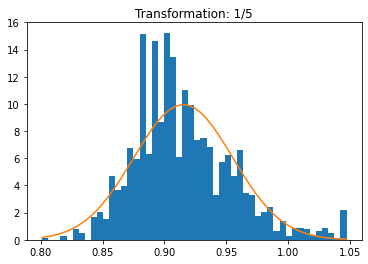

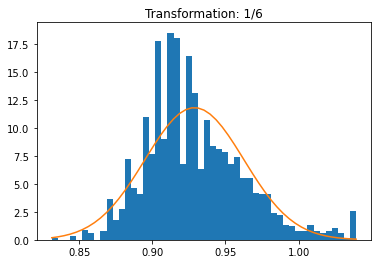

In [57]:
# Box-Cox transformation
for i in [1, 2, 3, 4, 5, 6]:
    data_t = data['sulphates']**(1/i)
    n, bins, patches = plt.hist(data_t, 50, density=True)
    mu = np.mean(data_t)
    sigma = np.std(data_t)
    plt.plot(bins, scipy.stats.norm.pdf(bins, mu, sigma))
    plt.title("Transformation: 1/{}".format(str(i)))
    plt.show()

from the graphs we can see that 1/5 is slightly better than 1/3, so we can save this one:

In [58]:
data['sulphates'] = data['sulphates'].apply(lambda x: x**(1/5))
data.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0       1.948695          0.751759     0.000000        1.238562   0.525053   
1       1.983192          0.902789     0.000000        1.375069   0.559508   
2       1.983192          0.802880     0.060870        1.320006   0.550740   
3       2.237378          0.361182     0.603995        1.238562   0.523318   
4       1.948695          0.751759     0.000000        1.238562   0.525053   

   free sulfur dioxide  total sulfur dioxide  density          pH  sulphates  \
0             2.902961              2.414736   0.9978  532.764873   0.890508   
1             4.181255              2.861006   0.9968  335.544320   0.925767   
2             3.332017              2.710806   0.9970  368.203575   0.917451   
3             3.522623              2.783158   0.9980  315.090575   0.896779   
4             2.902961              2.414736   0.9978  532.764873   0.890508   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

#### QQ plotting for `alcohol`

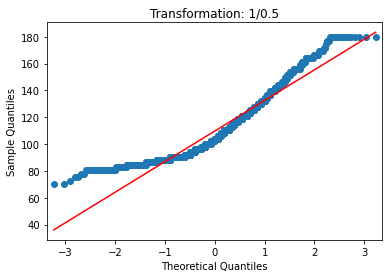

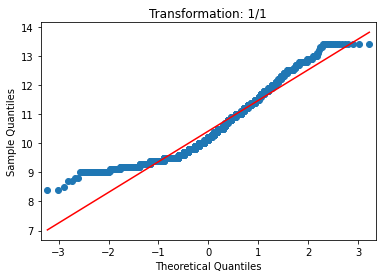

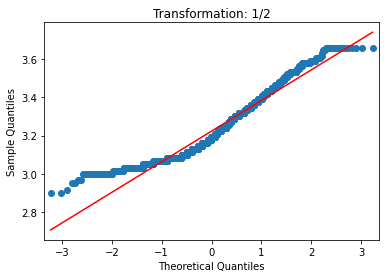

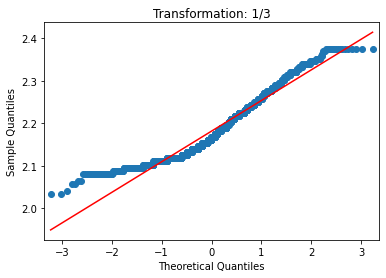

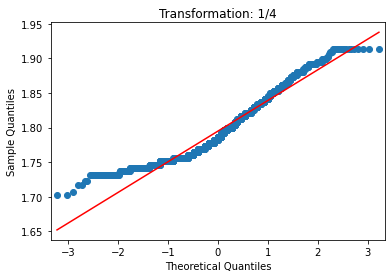

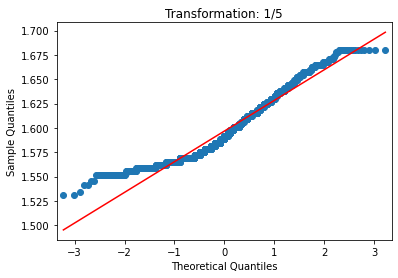

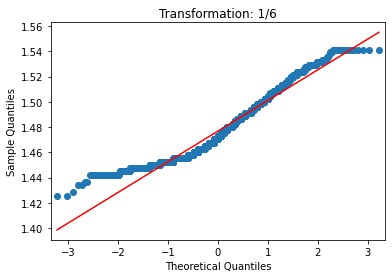

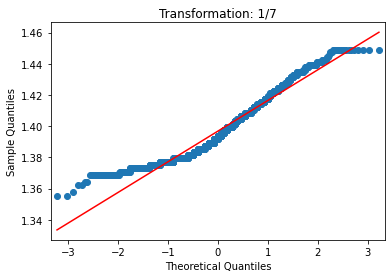

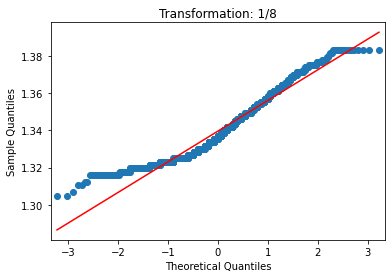

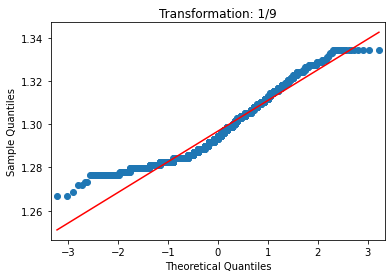

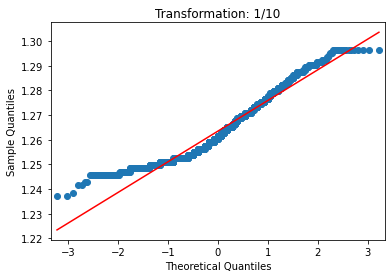

In [59]:
for i in [0.5, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]:
    data_t = data['alcohol']**(1/i)
    qqplot(data_t, line='s')
    plt.title("Transformation: 1/{}".format(str(i)))

the best distribution for `alcohol` happens at 1/2 where the blue point align more close to the red line. based on this we can reduce the values for the histogram:

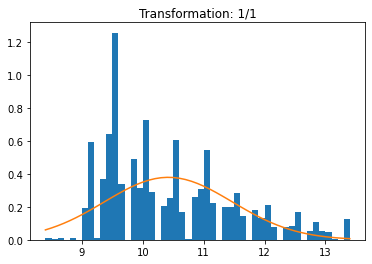

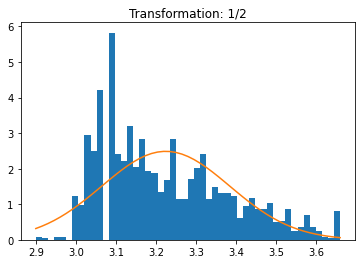

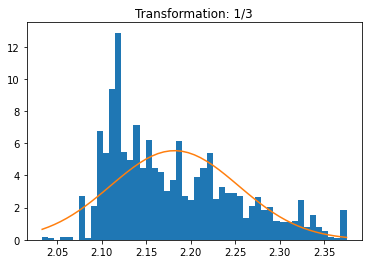

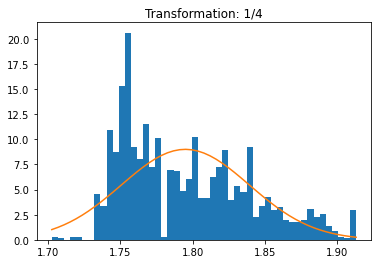

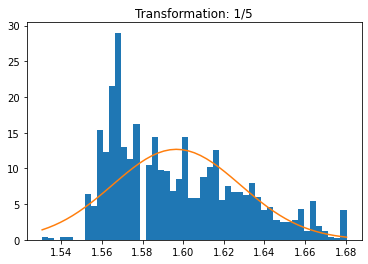

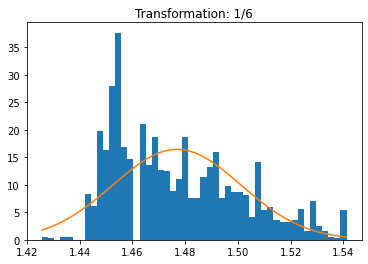

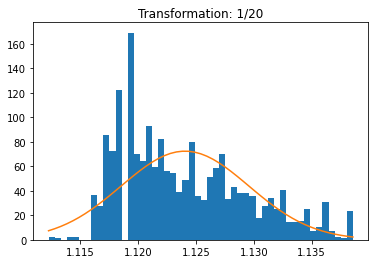

In [60]:
# Box-Cox transformation
for i in [1, 2, 3, 4, 5, 6, 20]:
    data_t = data['alcohol']**(1/i)
    n, bins, patches = plt.hist(data_t, 50, density=True)
    mu = np.mean(data_t)
    sigma = np.std(data_t)
    plt.plot(bins, scipy.stats.norm.pdf(bins, mu, sigma))
    plt.title("Transformation: 1/{}".format(str(i)))
    plt.show()

from the graphs we can see that after 1/2 there are much improvement in the distribution, so we can save this one:

In [61]:
data['alcohol'] = data['alcohol'].apply(lambda x: x**(1/2))
data.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0       1.948695          0.751759     0.000000        1.238562   0.525053   
1       1.983192          0.902789     0.000000        1.375069   0.559508   
2       1.983192          0.802880     0.060870        1.320006   0.550740   
3       2.237378          0.361182     0.603995        1.238562   0.523318   
4       1.948695          0.751759     0.000000        1.238562   0.525053   

   free sulfur dioxide  total sulfur dioxide  density          pH  sulphates  \
0             2.902961              2.414736   0.9978  532.764873   0.890508   
1             4.181255              2.861006   0.9968  335.544320   0.925767   
2             3.332017              2.710806   0.9970  368.203575   0.917451   
3             3.522623              2.783158   0.9980  315.090575   0.896779   
4             2.902961              2.414736   0.9978  532.764873   0.890508   

    alcohol  quality  
0  3.065942        5  
1  3.130495        5  
2  3.130495        5  
3  3.130495        6  
4  3.065942        5

### **Correlation**

<AxesSubplot:>

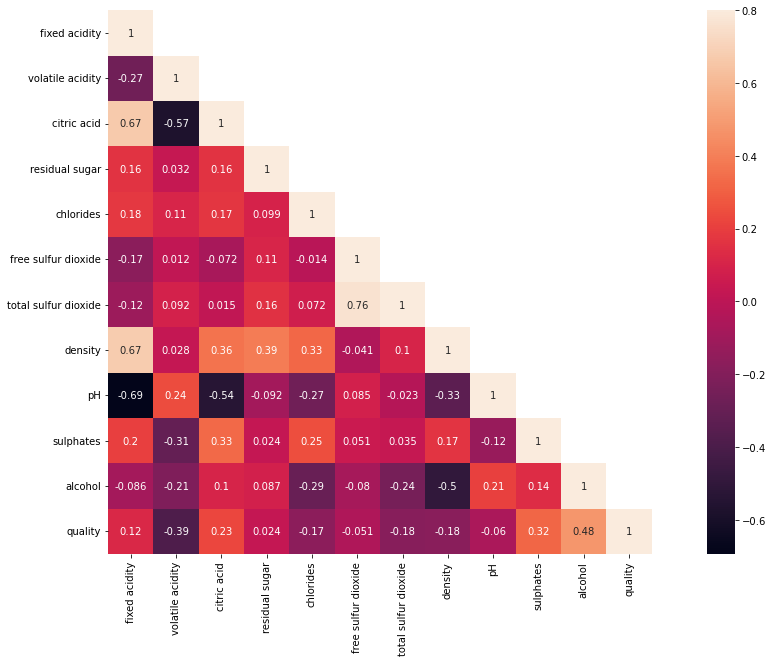

In [62]:
import seaborn as sn
# Correlation analasys
corrMatt = data[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density'
         ,'pH', 'sulphates', 'alcohol', 'quality']].corr()
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sn.heatmap(corrMatt, mask=mask,vmax=.8, square=True,annot=True)

too low or too high correlation are not good for modeling. Features with very low correlation create extra noise and might confuse the models while high correlation might result in data leakage and affect model too much by making optimistic predictions. So we can remove the following feature from our dataset because of very low correlation:
- residual sugar
- free slufur dioxide
- pH

The highest correlations we have are 48% for alcohol and -39% for volatile acidity. Since these are not exceptionally high we can keep them; however, if our models have a low accuracy we can explore the affects of removing these features. 

### **Removing unnecessary features**

In [63]:
data.drop(['residual sugar', 'free sulfur dioxide', 'pH'], axis=1, inplace=True)
data.head()

fixed acidity  volatile acidity  citric acid  chlorides  \
0       1.948695          0.751759     0.000000   0.525053   
1       1.983192          0.902789     0.000000   0.559508   
2       1.983192          0.802880     0.060870   0.550740   
3       2.237378          0.361182     0.603995   0.523318   
4       1.948695          0.751759     0.000000   0.525053   

   total sulfur dioxide  density  sulphates   alcohol  quality  
0              2.414736   0.9978   0.890508  3.065942        5  
1              2.861006   0.9968   0.925767  3.130495        5  
2              2.710806   0.9970   0.917451  3.130495        5  
3              2.783158   0.9980   0.896779  3.130495        6  
4              2.414736   0.9978   0.890508  3.065942        5

We save the cleaned data as follows:

In [64]:
data.to_csv('winequality-red-cleaned.csv', index=False)

## **F. Modeling**



*TODO*
<li>Implement Multivariable Linear Regression using any 2 Regression algorithms of your choice</li>
<li>Implement a Neural Network using Tensorflow and Keras to classify wine quality</li>

### **Regression algorithms**

The two algorithm used will be linear regression and Random Forest 

#### Splitting data for modeling 

In [65]:
# Some libraries tend to be in flux for their dependency versions
import warnings
warnings.simplefilter("ignore")
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn
from sklearn import datasets
from sklearn.model_selection import train_test_split

%matplotlib inline

from sklearn.preprocessing import StandardScaler

data = pd.read_csv('winequality-red-cleaned.csv')
data.head()

fixed acidity  volatile acidity  citric acid  chlorides  \
0       1.948695          0.751759     0.000000   0.525053   
1       1.983192          0.902789     0.000000   0.559508   
2       1.983192          0.802880     0.060870   0.550740   
3       2.237378          0.361182     0.603995   0.523318   
4       1.948695          0.751759     0.000000   0.525053   

   total sulfur dioxide  density  sulphates   alcohol  quality  
0              2.414736   0.9978   0.890508  3.065942        5  
1              2.861006   0.9968   0.925767  3.130495        5  
2              2.710806   0.9970   0.917451  3.130495        5  
3              2.783158   0.9980   0.896779  3.130495        6  
4              2.414736   0.9978   0.890508  3.065942        5

In [66]:
features = data.drop('quality', axis=1)
labels = data['quality']

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.4, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

In [67]:
for dataset in [y_train, y_val, y_test]:
    print(round(len(dataset) / len(labels), 2))

0.6
0.2
0.2


#### Feature scaling

In [68]:
# Some libraries tend to be in flux for their dependency versions
import warnings
warnings.simplefilter("ignore")
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn
from sklearn import datasets
from sklearn.model_selection import train_test_split

%matplotlib inline

from sklearn.preprocessing import StandardScaler


In [69]:
from sklearn.preprocessing import StandardScaler

data_train = X_train
data_val = X_val
data_test = X_test
data_train.head()

fixed acidity  volatile acidity  citric acid  chlorides  \
558        2.217220          0.601756     0.537781   0.586098   
139        1.983192          0.628855     0.235955   0.533484   
1392       1.921997          0.682203     0.086601   0.514369   
993        1.921997          0.421874     0.330573   0.535123   
224        2.032793          0.695375     0.411316   0.546195   

      total sulfur dioxide  density  sulphates   alcohol  
558               2.030543  1.00020   0.890508  3.420526  
139               3.223710  0.99620   0.884054  3.082207  
1392              1.861210  0.99420   0.863472  3.130495  
993               2.871622  0.99694   0.863472  3.065942  
224               2.723270  0.99745   0.893665  3.224903

In [70]:
pd.DataFrame(data_train).describe().head(3)

fixed acidity  volatile acidity  citric acid   chlorides  \
count     959.000000        959.000000   959.000000  959.000000   
mean        2.013443          0.595825     0.308254    0.535588   
std         0.129639          0.156729     0.204476    0.044082   

       total sulfur dioxide     density   sulphates     alcohol  
count            959.000000  959.000000  959.000000  959.000000  
mean               2.499020    0.996742    0.915398    3.226055  
std                0.432287    0.001807    0.039995    0.160269

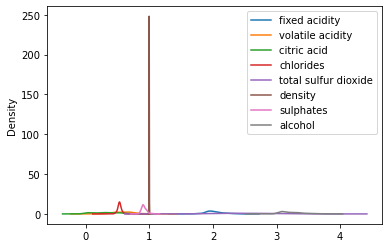

In [71]:
pd.DataFrame(data_train).plot(kind='kde');

In [72]:
# Fit the scaler on the training data
scaler = StandardScaler()
scaler.fit(data_train)

StandardScaler()

In [73]:
# Scale the training, test, and validation sets
features = data_train.columns

data_train[features] = scaler.transform(data_train[features])
data_val[features] = scaler.transform(data_val[features])
data_test[features] = scaler.transform(data_test[features])

data_train.head()

fixed acidity  volatile acidity  citric acid  chlorides  \
558        1.572709          0.037862     1.123097   1.146408   
139       -0.233466          0.210852    -0.353764  -0.047765   
1392      -0.705757          0.551411    -1.084566  -0.481614   
993       -0.705757         -1.110462     0.109212  -0.010565   
224        0.149337          0.635500     0.504296   0.240730   

      total sulfur dioxide   density  sulphates   alcohol  
558              -1.084284  1.914355  -0.622676  1.214035  
139               1.677284 -0.299871  -0.784121 -0.898006  
1392             -1.476204 -1.406983  -1.299003 -0.596556  
993               0.862381  0.109761  -1.299003 -0.999545  
224               0.519022  0.392075  -0.543677 -0.007191

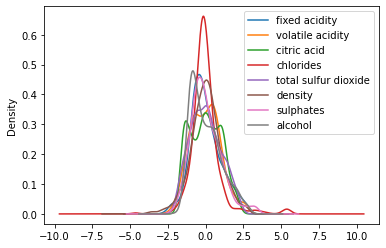

In [74]:
pd.DataFrame(data_train).plot(kind='kde');

In [75]:
#write out dataset:
data_train.to_csv('train_features.csv', index=False)
data_val.to_csv('val_features.csv', index=False)
data_test.to_csv('test_features.csv', index=False)


#### Logistic Regrassion

In [76]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV # used for tuning algorithms and hyperparameters

tr_features = pd.read_csv('train_features.csv')
tr_labels = pd.read_csv('train_labels.csv')

In [77]:
def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))

    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))

C hyperparameter tuning:

In [78]:
lr1 = LogisticRegression(max_iter=3000)
parameters = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]
}

cv = GridSearchCV(lr1, parameters, cv=5)
cv.fit(tr_features, tr_labels.values.ravel())

print_results(cv)



BEST PARAMS: {'C': 1}

0.58 (+/-0.071) for {'C': 0.001}
0.588 (+/-0.066) for {'C': 0.01}
0.601 (+/-0.063) for {'C': 0.1}
0.604 (+/-0.056) for {'C': 1}
0.602 (+/-0.057) for {'C': 10}
0.601 (+/-0.06) for {'C': 100}
0.601 (+/-0.06) for {'C': 1000}


we can see that the best C value has 60.3% score

In [79]:
lr = LogisticRegression(max_iter=3000, C = 1)
lr.fit(tr_features, tr_labels)
predicted = lr.predict(tr_features)
lr

LogisticRegression(C=1, max_iter=3000)

In [80]:
import joblib
joblib.dump(lr, 'LR_model.pkl')

['LR_model.pkl']

#### Random Forest

In [81]:
import joblib
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=DeprecationWarning)

tr_features = pd.read_csv('train_features.csv')
tr_labels = pd.read_csv('train_labels.csv')

hyperparameter tuning:

In [82]:
rf1 = RandomForestRegressor()
parameters = {
    'n_estimators': [5, 50, 250],
    'max_depth': [2, 4, 8, 16, 32, None]
}

cv = GridSearchCV(rf1, parameters, cv=5)
cv.fit(tr_features, tr_labels.values.ravel())

print_results(cv)

BEST PARAMS: {'max_depth': None, 'n_estimators': 250}

0.281 (+/-0.113) for {'max_depth': 2, 'n_estimators': 5}
0.302 (+/-0.138) for {'max_depth': 2, 'n_estimators': 50}
0.303 (+/-0.146) for {'max_depth': 2, 'n_estimators': 250}
0.331 (+/-0.193) for {'max_depth': 4, 'n_estimators': 5}
0.363 (+/-0.143) for {'max_depth': 4, 'n_estimators': 50}
0.361 (+/-0.156) for {'max_depth': 4, 'n_estimators': 250}
0.319 (+/-0.135) for {'max_depth': 8, 'n_estimators': 5}
0.374 (+/-0.159) for {'max_depth': 8, 'n_estimators': 50}
0.388 (+/-0.157) for {'max_depth': 8, 'n_estimators': 250}
0.277 (+/-0.214) for {'max_depth': 16, 'n_estimators': 5}
0.398 (+/-0.162) for {'max_depth': 16, 'n_estimators': 50}
0.404 (+/-0.147) for {'max_depth': 16, 'n_estimators': 250}
0.281 (+/-0.154) for {'max_depth': 32, 'n_estimators': 5}
0.387 (+/-0.178) for {'max_depth': 32, 'n_estimators': 50}
0.402 (+/-0.158) for {'max_depth': 32, 'n_estimators': 250}
0.287 (+/-0.184) for {'max_depth': None, 'n_estimators': 5}
0.39 (+/-

In [83]:
rf = RandomForestRegressor(n_estimators = 250, max_depth = None)
rf.fit(tr_features, tr_labels)

RandomForestRegressor(n_estimators=250)

In [84]:
joblib.dump(rf, 'RF_model.pkl')

['RF_model.pkl']

### **Neural Network**

In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout


#### splitting data for modeling

In [86]:
data = pd.read_csv('winequality-red-cleaned.csv')
data.head()

fixed acidity  volatile acidity  citric acid  chlorides  \
0       1.948695          0.751759     0.000000   0.525053   
1       1.983192          0.902789     0.000000   0.559508   
2       1.983192          0.802880     0.060870   0.550740   
3       2.237378          0.361182     0.603995   0.523318   
4       1.948695          0.751759     0.000000   0.525053   

   total sulfur dioxide  density  sulphates   alcohol  quality  
0              2.414736   0.9978   0.890508  3.065942        5  
1              2.861006   0.9968   0.925767  3.130495        5  
2              2.710806   0.9970   0.917451  3.130495        5  
3              2.783158   0.9980   0.896779  3.130495        6  
4              2.414736   0.9978   0.890508  3.065942        5

In [87]:


X = data.loc[:, data.columns != 'quality'].values
y = data.quality.values
le = LabelEncoder()
y = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

y_train_cat = to_categorical(y_train, 6)
y_test_cat = to_categorical(y_test, 6)



In [88]:


scaler = RobustScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print(X_train.shape)
print(X_test.shape)



(1279, 8)
(320, 8)


In [89]:
xavier_init = tf.keras.initializers.GlorotNormal()

model = Sequential()
model.add(Dense(64, kernel_initializer=xavier_init,  activation='relu'))
model.add(Dense(32, kernel_initializer=xavier_init, activation='relu'))
model.add(Dense(16, kernel_initializer=xavier_init, activation='relu'))
model.add(Dense(6, kernel_initializer=xavier_init, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [90]:


knn= model.fit(X_train,
          y_train_cat,
          epochs=30,
          validation_data=(X_test,y_test_cat),
          verbose=1)



Epoch 1/30
40/40 [==============================] - 1s 12ms/step - loss: 1.7288 - accuracy: 0.3941 - val_loss: 1.6037 - val_accuracy: 0.5281
Epoch 2/30
40/40 [==============================] - 0s 8ms/step - loss: 1.4223 - accuracy: 0.5231 - val_loss: 1.2492 - val_accuracy: 0.5437
Epoch 3/30
40/40 [==============================] - 0s 7ms/step - loss: 1.1251 - accuracy: 0.5809 - val_loss: 1.0742 - val_accuracy: 0.5875
Epoch 4/30
40/40 [==============================] - 0s 7ms/step - loss: 1.0346 - accuracy: 0.5989 - val_loss: 1.0287 - val_accuracy: 0.5969
Epoch 5/30
40/40 [==============================] - 0s 7ms/step - loss: 1.0058 - accuracy: 0.6138 - val_loss: 1.0043 - val_accuracy: 0.5906
Epoch 6/30
40/40 [==============================] - 0s 7ms/step - loss: 0.9833 - accuracy: 0.6052 - val_loss: 1.0003 - val_accuracy: 0.5813
Epoch 7/30
40/40 [==============================] - 0s 7ms/step - loss: 0.9617 - accuracy: 0.6200 - val_loss: 0.9811 - val_accuracy: 0.5594
Epoch 8/30
40/40 [=

## **G. Model Evaluation**

### background infor



Evaluating the model accuracy is an essential part of the process in creating machine learning models to describe how well the model is performing in its predictions. Evaluation metrics change according to the problem type. Here, we'll briefly learn how to check the accuracy of the regression model.

The linear model (regression) can be a typical example of this type of problem, and the main characteristic of the regression problem is that the targets of a dataset contain the real numbers only. The errors represent how much the model is making mistakes in its prediction. The basic concept of accuracy evaluation is to compare the original target with the predicted one according to certain metrics.


**Regression model evaluation metrics**

The MAE, RMSE, and R-Squared metrics are mainly used to evaluate the prediction error rates and model performance in regression analysis.

**MAE (Mean absolute error)** represents the difference between the original and predicted values extracted by averaged the absolute difference over the data set.

**RMSE (Root Mean Squared Error)** is the error rate by the square root of MSE.

**R-squared (Coefficient of determination)** represents the coefficient of how well the values fit compared to the original values. The value from 0 to 1 interpreted as percentages. The higher the value is, the better the model is.

The above metrics can be expressed as following:
<img src = "https://4.bp.blogspot.com/-wG7IbjTfE6k/XGUvqm7TCVI/AAAAAAAAAZU/vpH1kuKTIooKTcVlnm1EVRCXLVZM9cPNgCLcBGAs/s1600/formula-MAE-MSE-RMSE-RSquared.JPG">

Please find more information on how to implement them from this link: https://scikit-learn.org/stable/modules/classes.html#regression-metrics

Find more about feature importances from here: https://machinelearningmastery.com/calculate-feature-importance-with-python/

**Classification model evaluation metrics**

<img src="https://www.researchgate.net/publication/336402347/figure/fig3/AS:812472659349505@1570719985505/Calculation-of-Precision-Recall-and-Accuracy-in-the-confusion-matrix.ppm">

*TODO*

**For Regression models**
<li>Use three metrics: R-squared, RMSE, and MAE, to evaluate model prediction performance</li>
<li>Compare these 3 metrics for the two models and analyze the performance</li>
<li>Calculate the feature importance scores for the top features that help predicting wine quality and visualize them</li>

**For Classification model**
<li> Plot training loss and validation loss </li>
<li> Plot training accuracy and validation accuracy </li>
<li> Evaluate the classsification model using Precision, Recall and Accuracy metrics </li>

### **Logistic Regression model**

#### R squared:

In [91]:
from sklearn.metrics import r2_score

actual = tr_labels
predicted = lr.predict(tr_features)
r2_score(actual, predicted)

0.24599634198752018

the score of 0.25 indicates that the values do not fit very well compared to the original meaning that about 25% of the observation can be explained by the input. 

#### RMSE

In [92]:
from sklearn.metrics import mean_squared_error
import math

actual = tr_labels
predicted = lr.predict(tr_features)
mse = mean_squared_error(actual, predicted)
rmse = math.sqrt(mse)
print(rmse)

0.7015549540080392


RMSE is quite large(70.1%) meaning that the actual and predicted response have a large difference from each  other

#### MAE

In [93]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(actual, predicted)

0.4191866527632951

MAE also indicates that 41.9% of the predications differe from the actual values. 

### **Random forest**

#### R-squared

In [94]:
actual = tr_labels
predicted = rf.predict(tr_features)
r2_score(actual, predicted)

0.9241144903535746

the score of 0.92 indicates that the values fit very well compared to the original meaning that about 92% of the observation can be explained by the input. 

#### RMSE

In [95]:
from sklearn.metrics import mean_squared_error
import math

actual = tr_labels
predicted = rf.predict(tr_features)
mse = mean_squared_error(actual, predicted)
rmse = math.sqrt(mse)
print(rmse)

0.22256373294899567


RMSE is quite small(22.4%) meaning that the actual and predicted response are very close

#### MAE

In [96]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(actual, predicted)

0.15750156412930125

The same thing as RMSE can be sais about MAE. The low score means that predicted values are close to the actual values

### **Comparsion of two model**

RF model has higher score than LR model meaning that RF model overal fits the data better generally. RF also had higher RMSE and MAE score meaning that the predictions made by this model is closer to the actual responses than the ones made by the logistic model. 
In conclusion, between Random Forest model and Logistic Regression model, the Random Forest models is better to be used for our purpose. 

### **Evaluation on validation & Test sets**

In [97]:
import joblib
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score
from time import time

val_features = pd.read_csv('val_features.csv')
val_labels = pd.read_csv('val_labels.csv')

te_features = pd.read_csv('test_features.csv')
te_labels = pd.read_csv('test_labels.csv')

In [98]:
def evaluate_model(name, model, features, labels):
    actual = labels
    predicted = model.predict(features)
    start = time()
    pred = model.predict(features)
    end = time()
    latency = round((end - start)*1000, 1)
    r2 = r2_score(actual, predicted)
    mse = mean_squared_error(actual, predicted)
    rmse = math.sqrt(mse)
    mae = mean_absolute_error(actual, predicted)
    print('{} --> R-squared= {} | RMSE= {} | MAE= {} | Latency= {}ms'.format(name, r2, rmse, mae, latency ))

In [99]:
models = {}

for mdl in ['LR','RF']:
    models[mdl] = joblib.load('{}_model.pkl'.format(mdl))

In [100]:
for name, mdl in models.items():
    evaluate_model(name, mdl, te_features, te_labels)

LR --> R-squared= 0.15138936930704494 | RMSE= 0.7093130479555554 | MAE= 0.440625 | Latency= 1.0ms
RF --> R-squared= 0.47865259079903144 | RMSE= 0.5559648370175941 | MAE= 0.4147499999999999 | Latency= 24.0ms


for the validation sets we can see event RF's R-squared dropped, it still is higher than LR's score, however, both RMSE and MAE  increase significantly for teh RF indicting that model is unable to predict as well when faced with new data. 

In [101]:
for name, mdl in models.items():
    evaluate_model(name, mdl, val_features, val_labels)

LR --> R-squared= 0.19535783365570603 | RMSE= 0.7541551564499178 | MAE= 0.48125 | Latency= 1.0ms
RF --> R-squared= 0.4175240276319425 | RMSE= 0.6416501772773074 | MAE= 0.4797624999999999 | Latency= 23.0ms


The RF model's performance for test set remains same as its performance for validation set. indicating we might need to review our EDA to see how we can imporve the data or consider using other algorithm for modeling purposes. 

### **Feature importance score**

from the original 12 features, we removed 3 features. considering that one feature is the target value, we have 8 features in total :0 -7

#### LR:

In [102]:
importance=lr.coef_[0]
importance=np.sort(importance)
for index,val in enumerate(importance):
    print("Feature : {} has score  : {} ".format(index,val))

Feature : 0 has score  : -0.8690723013939686 
Feature : 1 has score  : -0.6084145055574534 
Feature : 2 has score  : -0.45030612940790005 
Feature : 3 has score  : -0.009746768282254775 
Feature : 4 has score  : 0.1030037336397972 
Feature : 5 has score  : 0.7402904145849339 
Feature : 6 has score  : 0.8369782068207071 
Feature : 7 has score  : 1.3336395993974801 


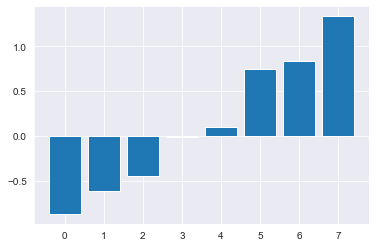

In [103]:
#plotting the features and their score in ascending order
sns.set_style("darkgrid")
plt.bar([i for i in range (len(importance))],importance)
plt.show()

based on LR model have 7 imporant features out of 8. forfuture revision we might consider removing feature 3 (`chloride`) from the dataset for LR model

#### RF:

Feature: 0, Score: 0.06943554793592452
Feature: 1, Score: 0.07333345131413897
Feature: 2, Score: 0.07531896222105283
Feature: 3, Score: 0.08126716124430762
Feature: 4, Score: 0.09459070583367411
Feature: 5, Score: 0.1387148041964456
Feature: 6, Score: 0.141563765051813
Feature: 7, Score: 0.32577560220264323


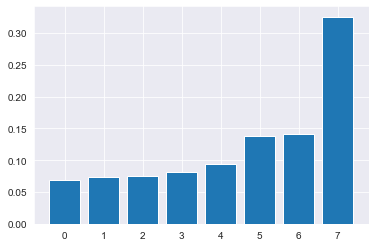

In [104]:
importance = rf.feature_importances_
importance=np.sort(importance)
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: {}, Score: {}'.format(i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

based on the RF model, all eight features are important with their important increasing in order from left to right

### **Keras model**

#### Plot training loss and validation loss

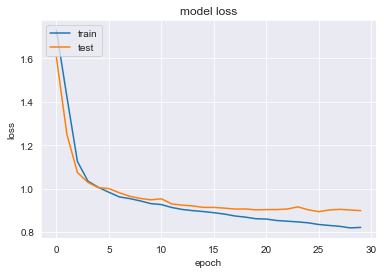

In [105]:
plt.plot(knn.history['loss'])
plt.plot(knn.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

We can as we proceed the loss for both the training and test decreases

#### Plot training accuracy and validation loss

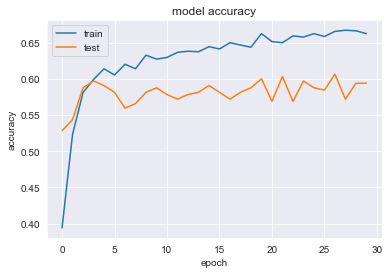

In [106]:
plt.plot(knn.history['accuracy'])
plt.plot(knn.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

the accuracy of the model gradually increases and this accuracy is higher for the training data than for validation (which makes sense). We can see that rate for do not look much constant indicating that having more data might be helpful in the training process. 

#### Confusion Matrix

In [107]:
predictions = le.inverse_transform(np.argmax(model.predict(X_train), axis=-1))

print(classification_report(le.inverse_transform(y_train),
                            predictions))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         9
           4       0.33      0.02      0.04        43
           5       0.75      0.75      0.75       551
           6       0.61      0.75      0.67       506
           7       0.68      0.41      0.51       157
           8       0.00      0.00      0.00        13

    accuracy                           0.67      1279
   macro avg       0.39      0.32      0.33      1279
weighted avg       0.66      0.67      0.65      1279



We can see that our model has the overall accuracy of 67%. The model has 33%-68% precision for wine quality 5-7 with highest recall for quality 5. As noted in EDA section we have way less data for qualities 3, 4, and 8 compared to 5, 6, and 7.Therefore our model is not capable of making good predictions for these qualities. 

In [109]:
predictions = le.inverse_transform(np.argmax(model.predict(X_test), axis=-1))

print(classification_report(le.inverse_transform(y_test),
                            predictions))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        10
           5       0.67      0.66      0.67       130
           6       0.54      0.68      0.60       132
           7       0.54      0.33      0.41        42
           8       0.00      0.00      0.00         5

    accuracy                           0.59       320
   macro avg       0.29      0.28      0.28       320
weighted avg       0.57      0.59      0.57       320



## **H. Conclusion**


after many consideration from the following features:
1.  fixed acidity
2. volatile acidity
3. citric acid
4. residual sugar
5.  chlorides
6.  free sulfur dioxide
7.  total sulfur dioxide
8.  density
9.  pH
10. sulphates
11. alcohol

It was decided that main features that affected the quality of red wine are:
1.  fixed acidity
2. volatile acidity
3. citric acid
4.  chlorides
5.  total sulfur dioxide
6.  density
7. sulphates
8. alcohol

in teh regression model analysis LR model noted that compared to the others, chloride levels of the red wine is not as imporant factor for quality of wine.  However, the RF model indicated that all 8 feature are important for determining the quality of red wine. Further exploration of features (removing chloride and/or testing models with the whole feature set) might result in more insight on affect of these feature on our target variable. 
between the two regression model, Random Forest was able to fit the data more closely and make better prediction during training phase however its performance dropped significantly during testing phase (still had higher performaance compared to LR). 

the KNN (keras neural network) model also had good overal accuracy score during training and a good precision, and recall scores for quality 5-7. Even though the scores were dropped during testing phase, their drop was not as siginificant as for RF. 

-**THE END** 